In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf

from math import sqrt
from pandas import datetime
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
 
import warnings
warnings.filterwarnings("ignore")

C:\Users\saikr\AppData\Local\Temp\ipykernel_24104\2664195310.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# Read the data set

coca=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coca.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [6]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [7]:
coca.describe

<bound method NDFrame.describe of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q

In [8]:
coca.size

84

In [9]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [10]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [11]:
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [12]:
coca.nunique

<bound method DataFrame.nunique of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   

In [13]:
coca.nunique()

Quarter    42
Sales      42
dtype: int64

#  Feature Engineering

In [14]:
# Converting the Quarters into Years

coca['Quarter_Year'] = coca['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
coca.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [15]:
# Converting into datetime formate as the index was not in correct formate.

coca['Date'] = (pd.to_datetime(coca['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
coca.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [16]:
# Extracting the Quarters and putting in column

coca["Quarters"]=0

for i in range(42):
    n=coca["Quarter"][i]
    coca["Quarters"][i]=n[0:2]
    
coca.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [17]:
# Creating Dummy Variables for Quarters Variable

dummy=pd.DataFrame(pd.get_dummies(coca["Quarters"]))
coca_cola=pd.concat((coca,dummy),axis=1)
coca_cola.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [18]:
# Dropping all the unnecessary column

coca_cola.drop(["Quarter","Quarter_Year"],axis=1,inplace=True)
coca_cola.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [19]:
# Making the Date as DateTime index for the Dataframe

coca_cola.set_index("Date",inplace=True)
coca_cola.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [20]:
coca_cola.head(10)

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0
1987-04-01,2104.411995,Q2,0,1,0,0
1987-07-01,2014.362999,Q3,0,0,1,0
1987-10-01,1991.746998,Q4,0,0,0,1
1988-01-01,1869.049999,Q1,1,0,0,0


In [21]:
# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

coca["Date"]=pd.to_datetime(coca.Date,format="%b-%y")

# Month Extraction
coca["month"]=coca.Date.dt.strftime("%b")

# Year Extraction
coca["year"]=coca.Date.dt.strftime("%Y")

coca.head(10)


,Quarter,Sales,Quarter_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


#  Data Visualization


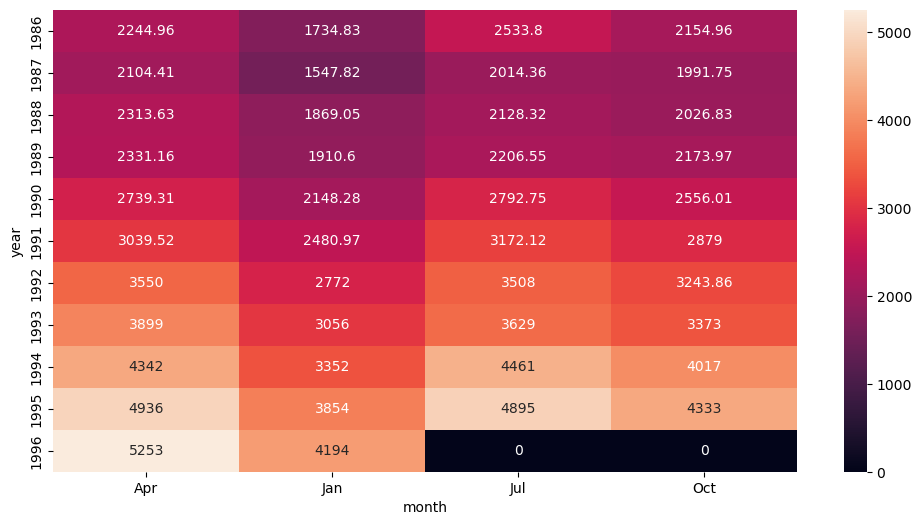

In [22]:
# Heatmap

plt.figure(figsize=(12,6))
heatmap_y_month=pd.pivot_table(data=coca,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

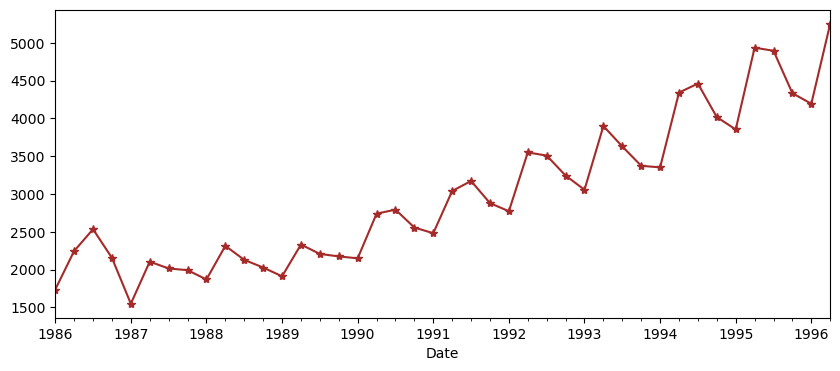

In [23]:
# Line Plot

coca_cola["Sales"].plot(figsize=(10,4),color="brown",marker="*")
plt.show()

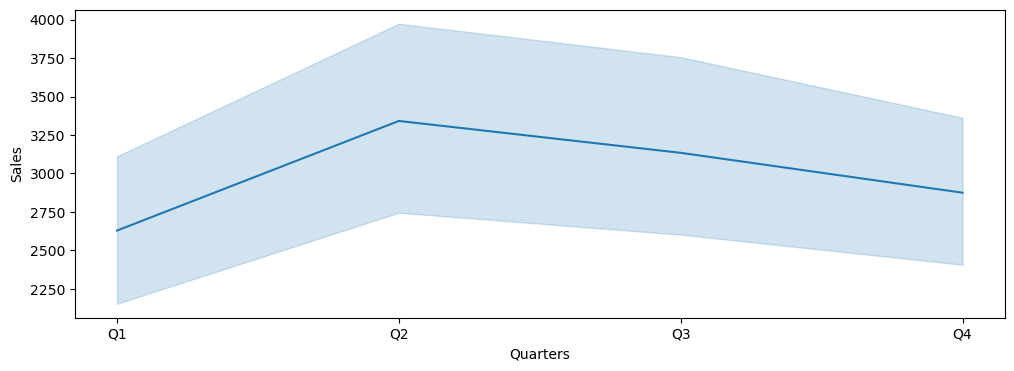

In [24]:
# Line Plot Using Quarters as Y axis and Sales as X axis

plt.figure(figsize=(12,4))
sns.lineplot(x="Quarters",y="Sales",data=coca)
plt.show()

<Axes: xlabel='year', ylabel='Sales'>

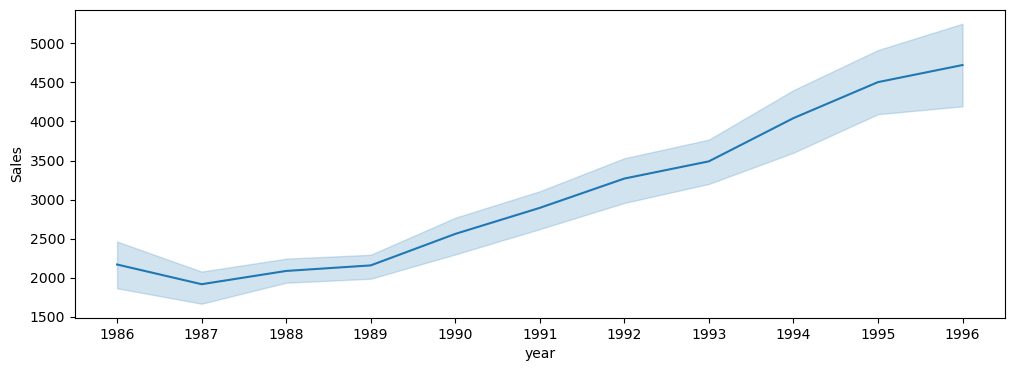

In [25]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Sales",data=coca)


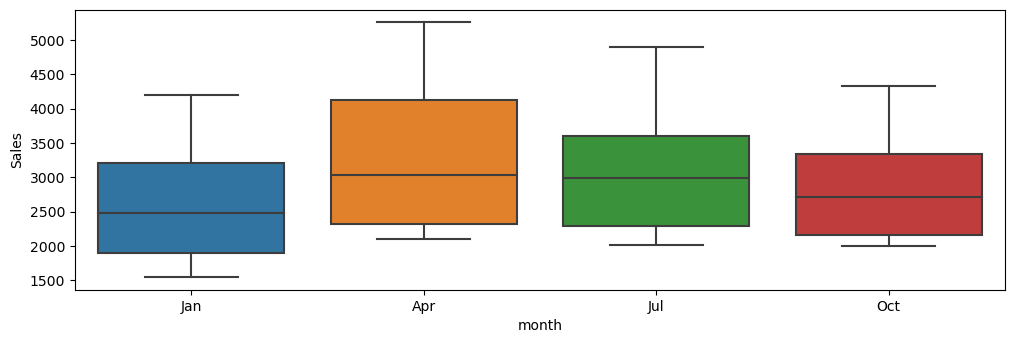

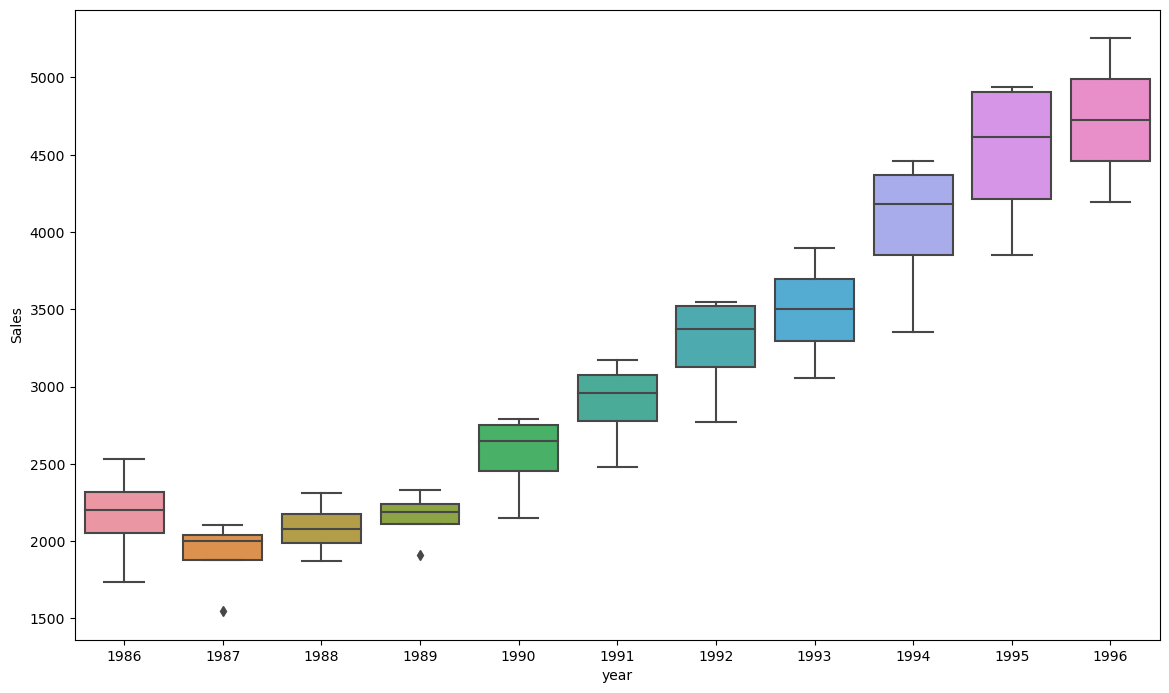

In [26]:
# Box Plot of Each Year by Quaterly Intervals

plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=coca)

plt.figure(figsize=(14,18))
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=coca)

plt.show()

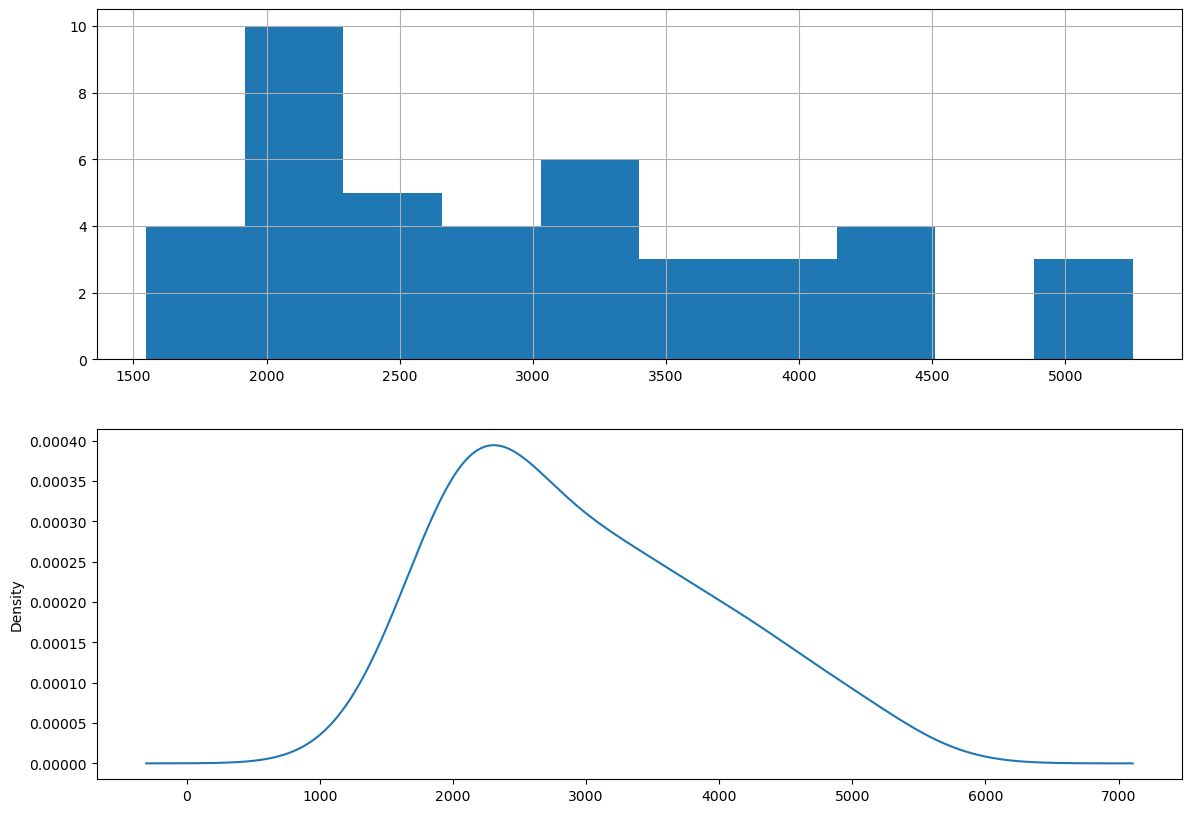

In [27]:
# Histogram and Density Plots

plt.figure(figsize=(14,10))
plt.subplot(211)
coca.Sales.hist()
plt.subplot(212)
coca.Sales.plot(kind="kde")
plt.show()

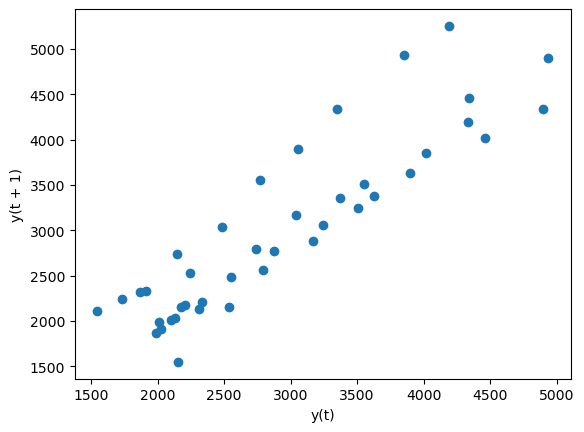

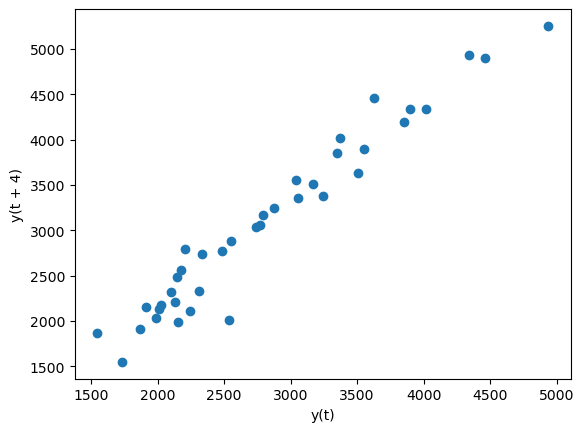

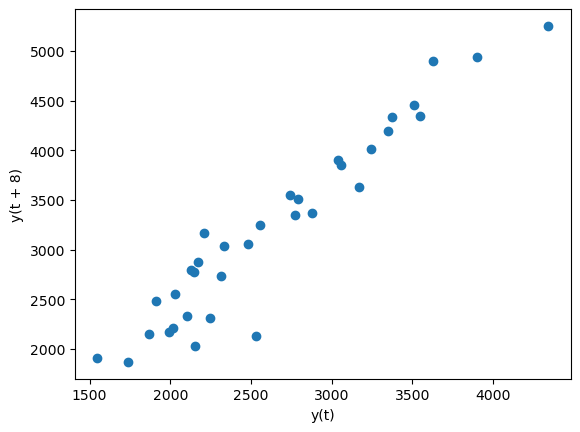

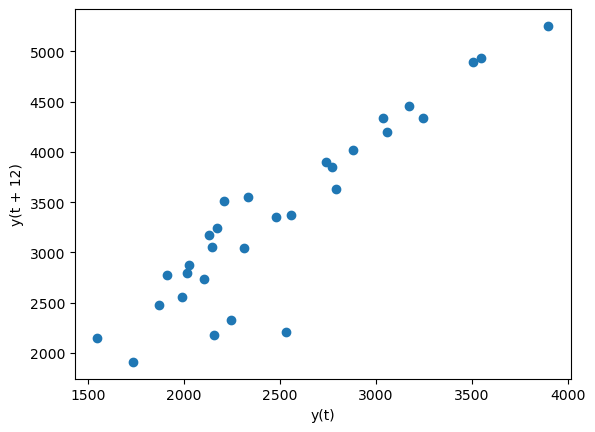

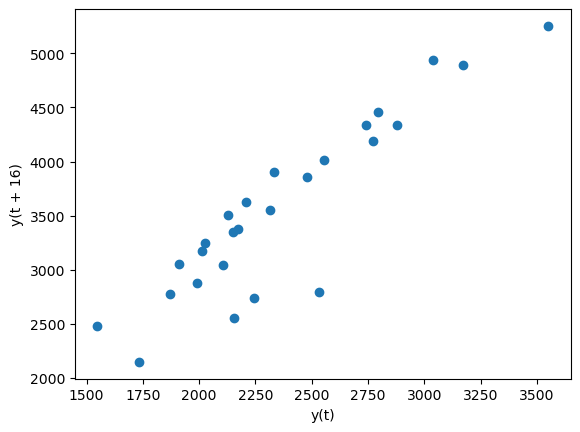

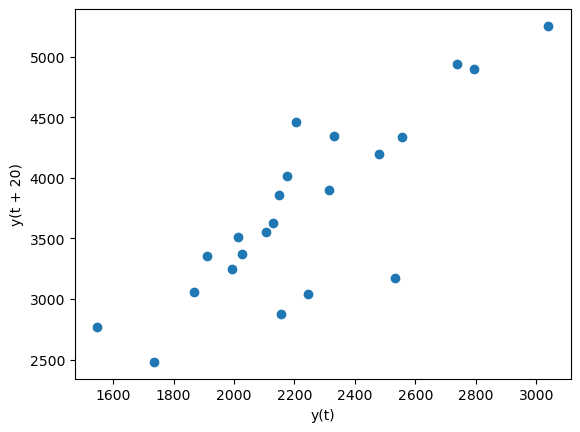

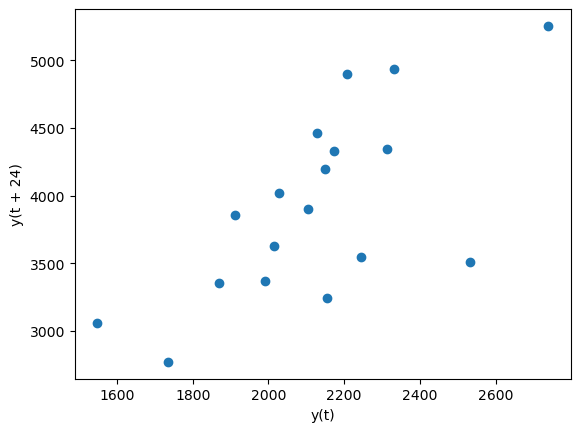

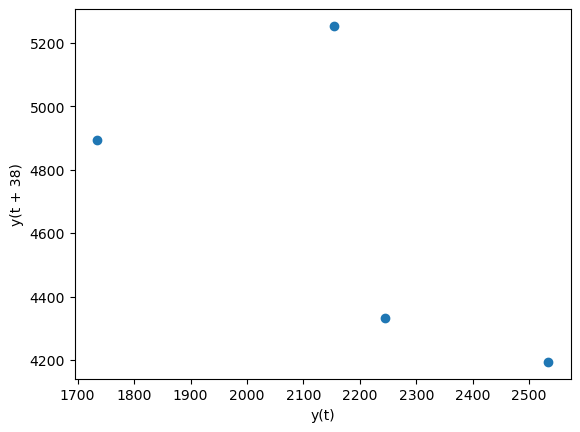

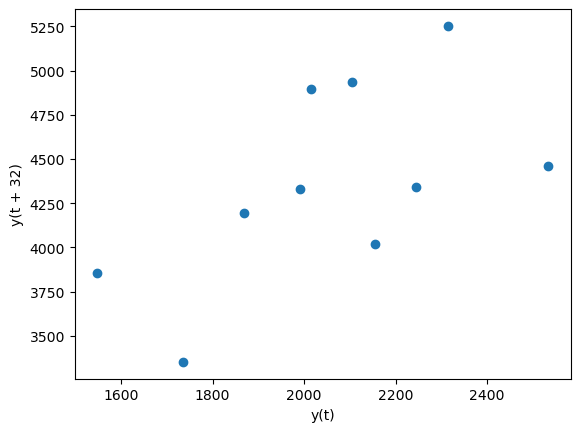

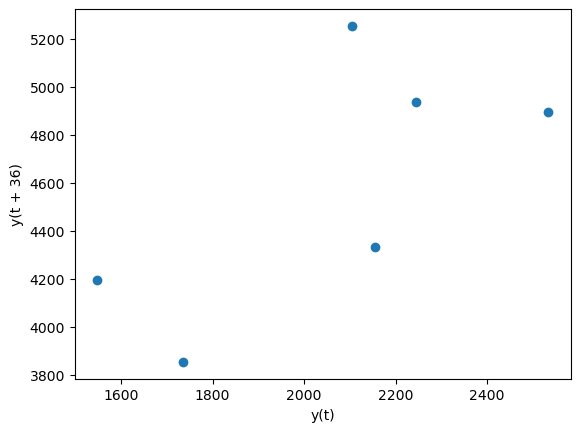

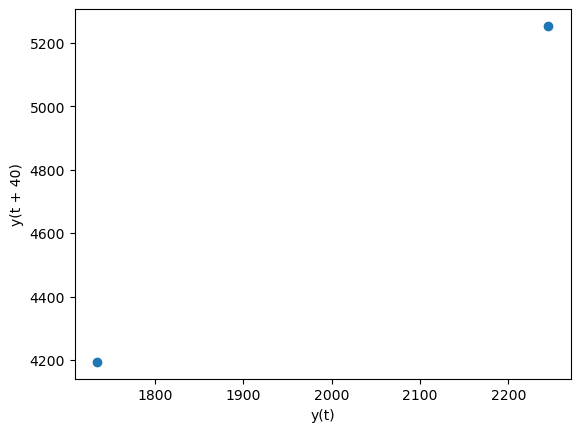

In [28]:
# Lag Plot

# Creating the scatter plot

for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    lag_plot(coca.Sales,lag=i)
    plt.show()


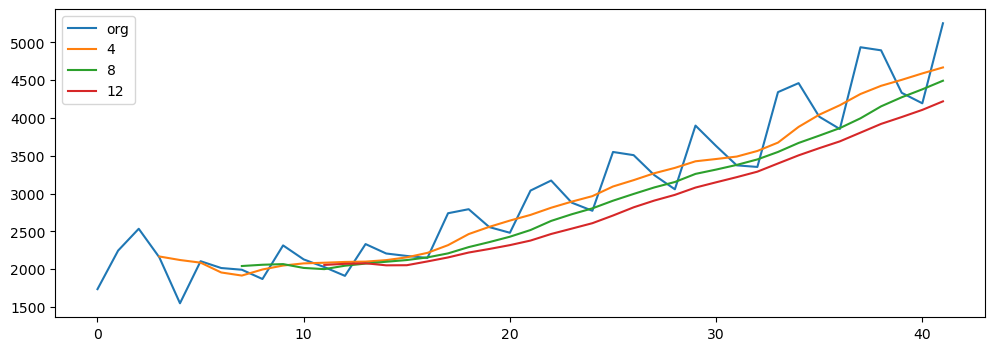

In [29]:
# Moving Average

plt.figure(figsize=(12,4))
coca.Sales.plot(label="org")
for i in range(4,13,4):
    coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

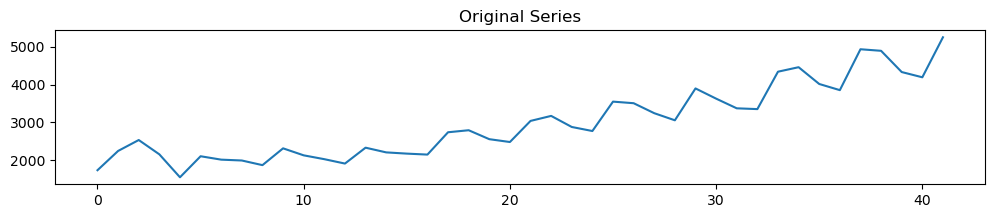

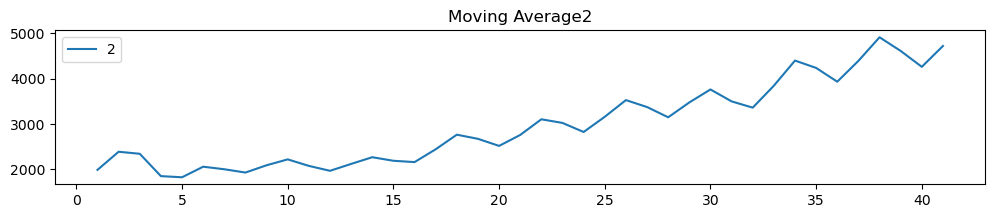

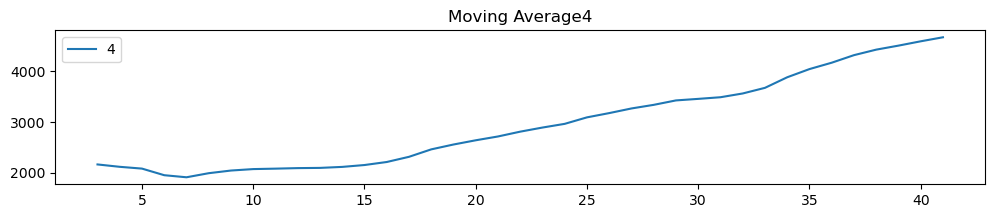

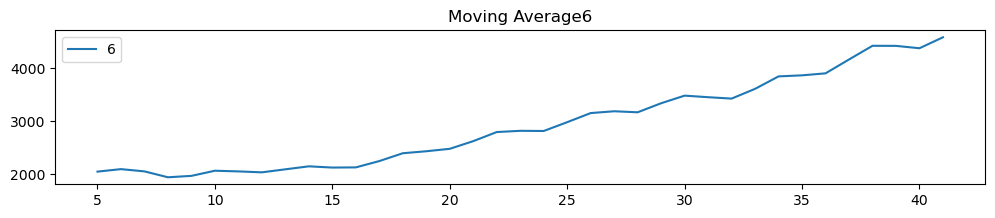

In [30]:
plt.figure(figsize=(12,2))
coca.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,7,2):
    plt.figure(figsize=(12,2))
    coca["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average"+str(i))
    plt.legend(loc="best")
    plt.show()

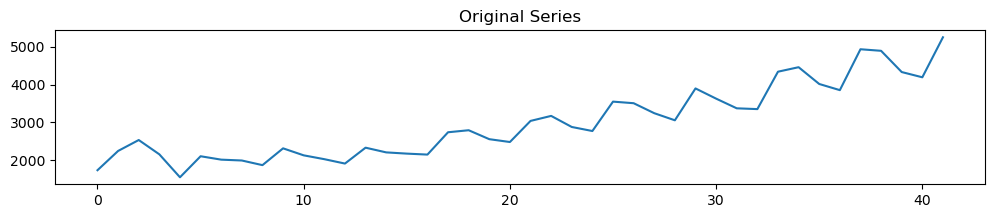

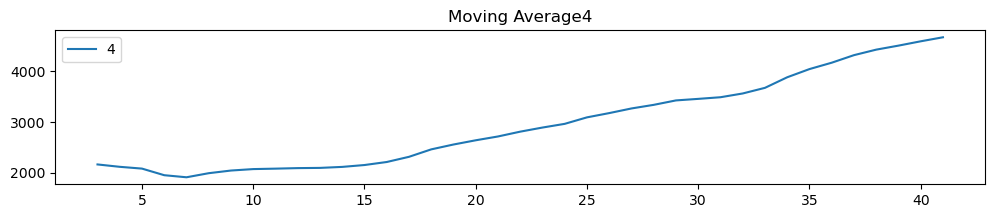

In [31]:
plt.figure(figsize=(12,2))
coca.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,2))
coca["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average"+str(4))
plt.legend(loc="best")
plt.show()

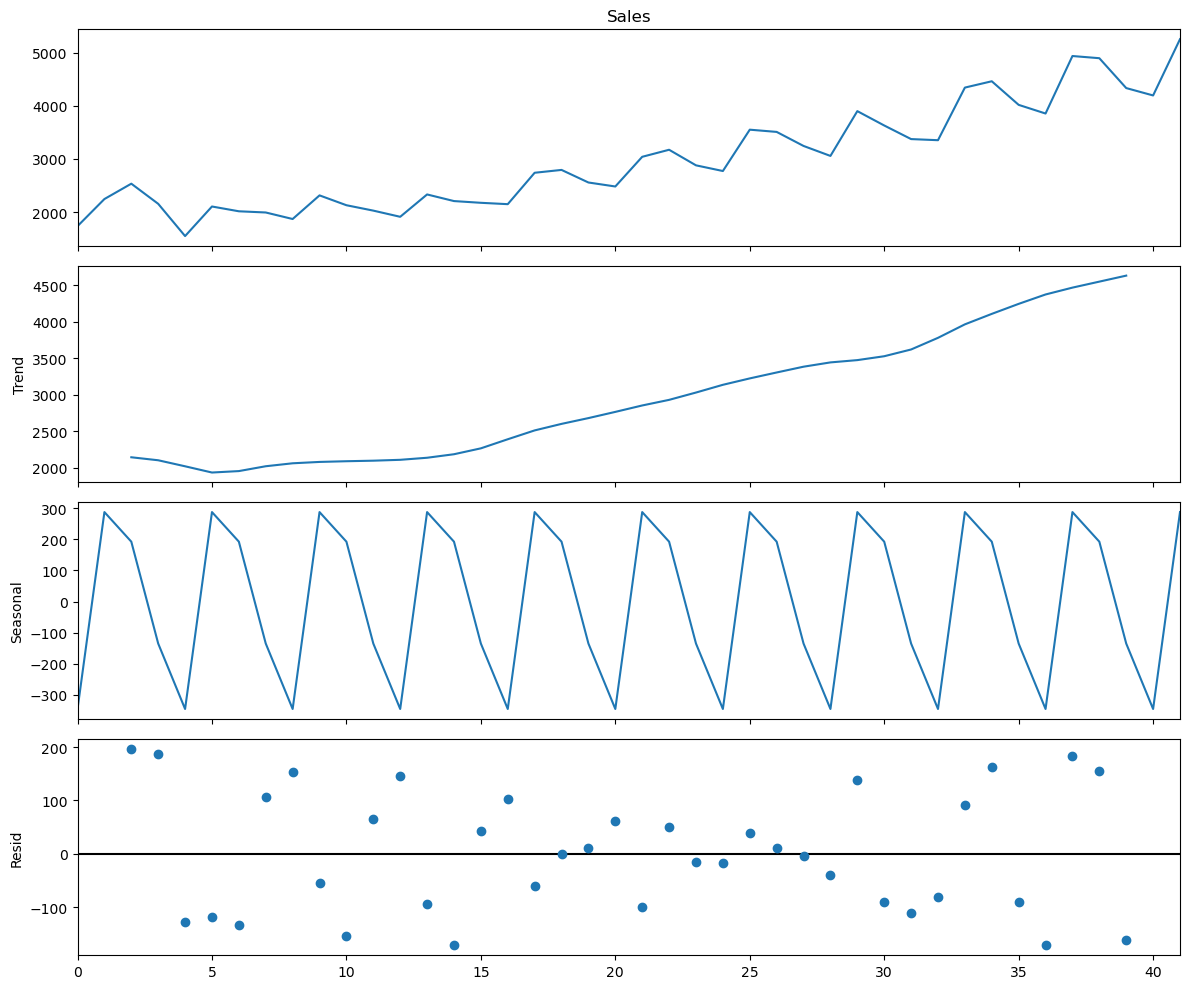

In [32]:
# Time series decomposition plot

decompose_ts_add=seasonal_decompose(coca.Sales,period=4)
with plt.rc_context():
    plt.rc("figure",figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

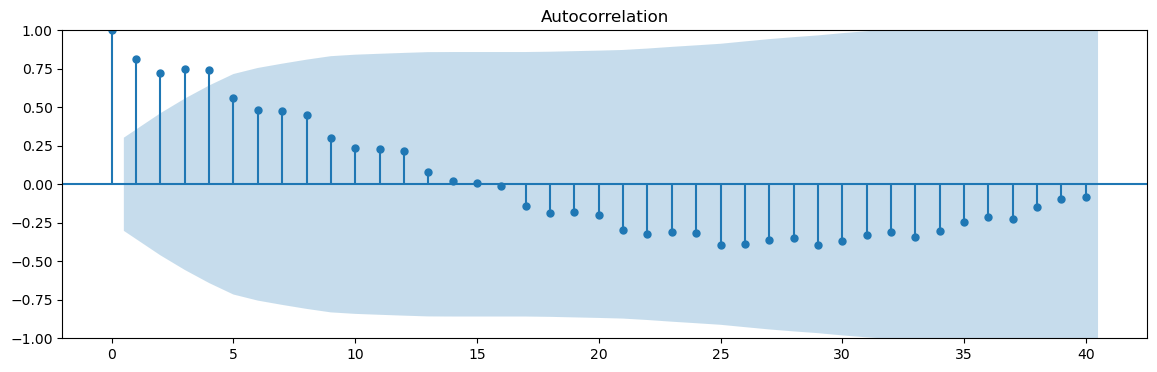

In [33]:
# ACF plots and PACF plots

# Autocorrelation Function (ACF)

import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(14,4))
    tsa_plots.plot_acf(coca.Sales,lags=40)
    plt.show()

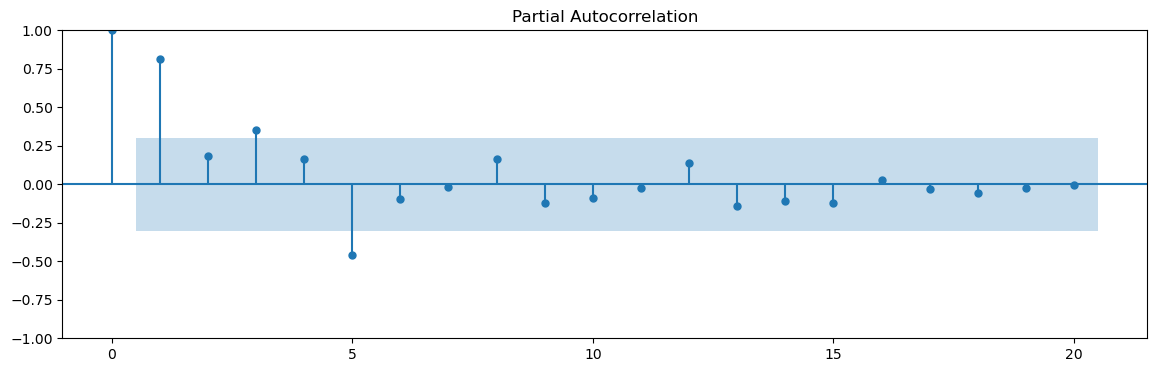

In [34]:
# Partial Autocorrelation Function (PACF)

import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(14,4))
    tsa_plots.plot_pacf(coca.Sales,lags=20)
    plt.show()

In [35]:
#Sampling

#Linear interpolation

#UpSampling with respect to month

upsampled_month=coca_cola.drop(["Quarters","Q1","Q2","Q3","Q4"],axis=1)
upsampled_month=upsampled_month.resample("M").mean()
print(upsampled_month.head(15))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996


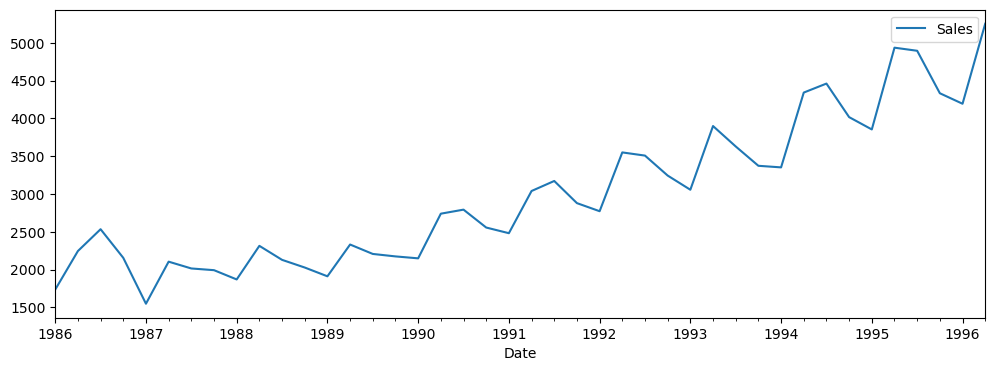

In [36]:
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(13))
interpolated_month.plot(figsize=(12,4))
plt.show()

In [37]:
interpolated_month

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [38]:
visual=interpolated_month.copy()
visual.reset_index(inplace=True)
visual["date"]=pd.to_datetime(visual["Date"])
visual["year"]=visual["Date"].dt.year
visual["month"]=visual["Date"].dt.month
visual["week"]=visual["Date"].dt.week
visual["quarter"]=visual["Date"].dt.quarter
visual["day_of_week"]=visual["Date"].dt.day_name()
visual.drop("Date",axis=1,inplace=True)
visual[:2]


,Sales,date,year,month,week,quarter,day_of_week
0,1734.827000,1986-01-31,1986,1,5,1,Friday
1,1904.871666,1986-02-28,1986,2,9,1,Friday


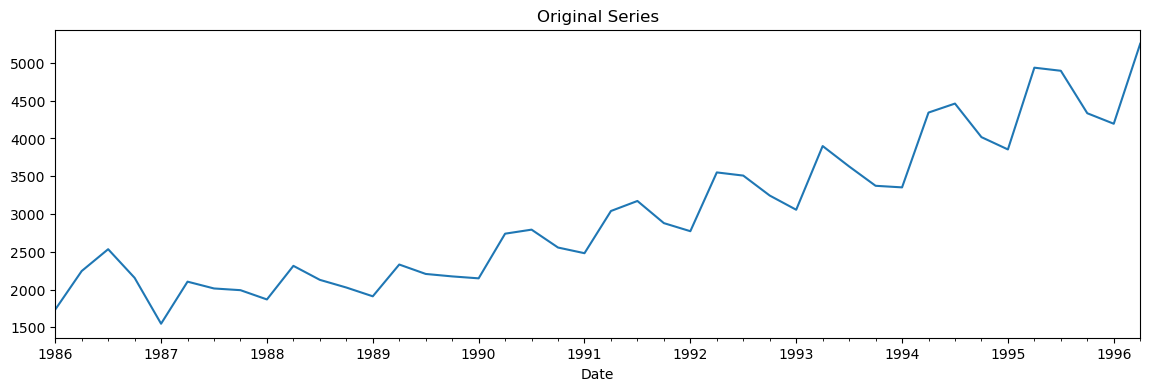

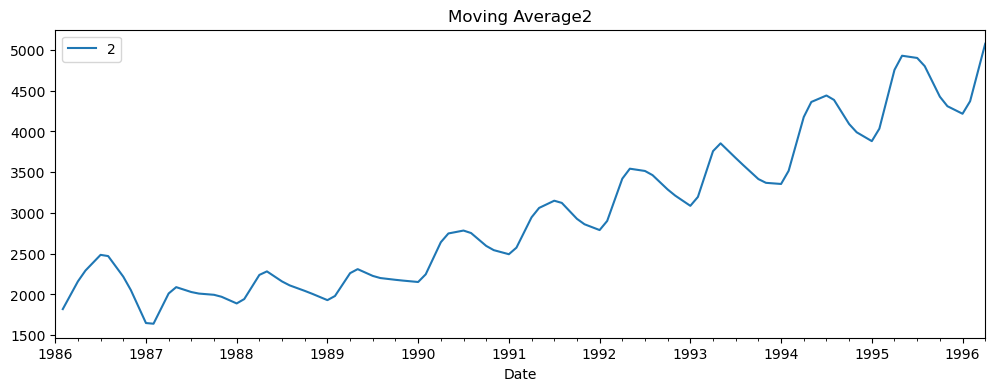

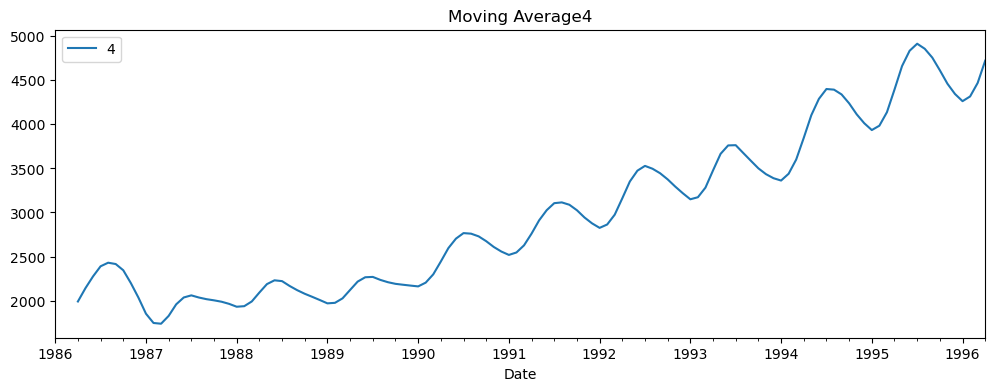

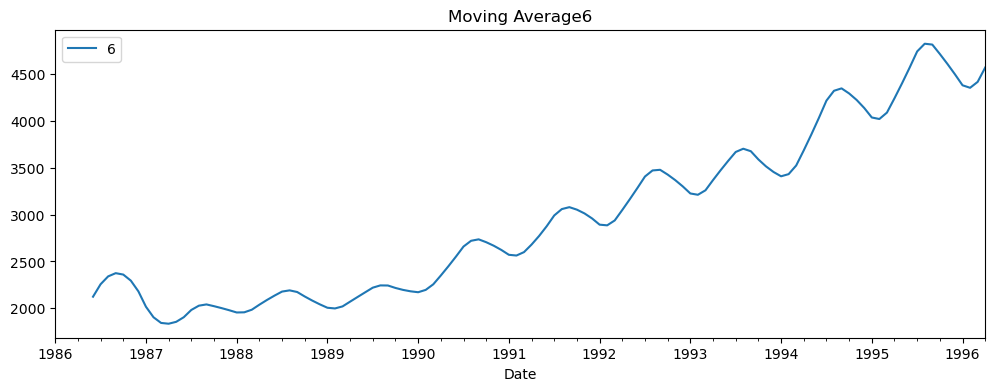

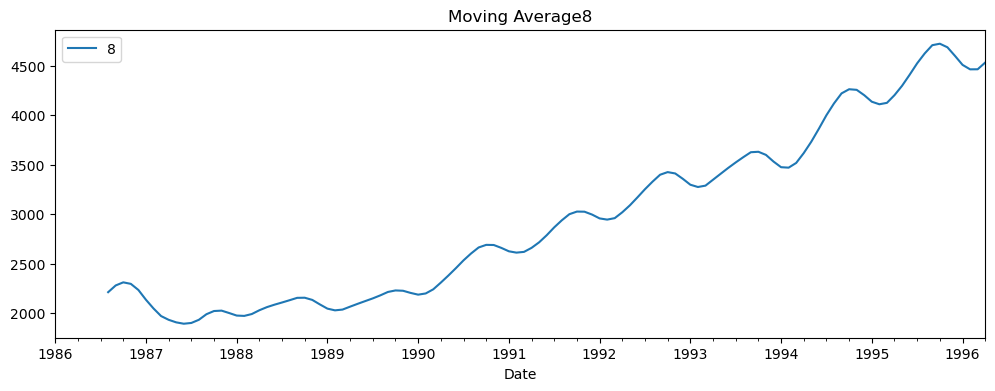

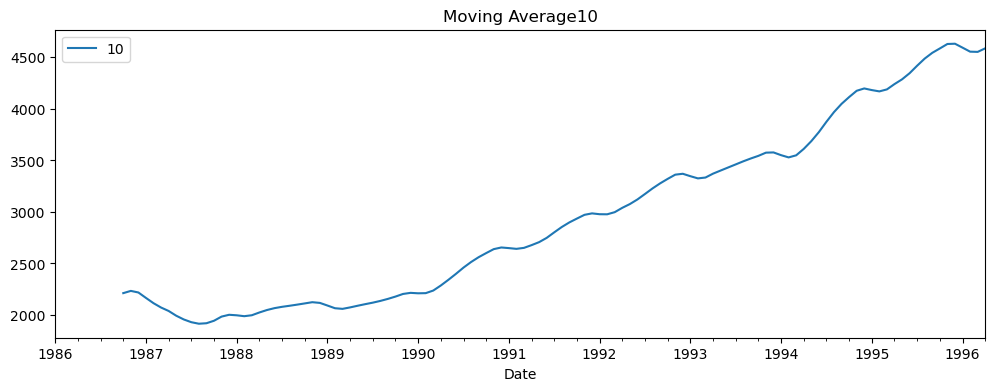

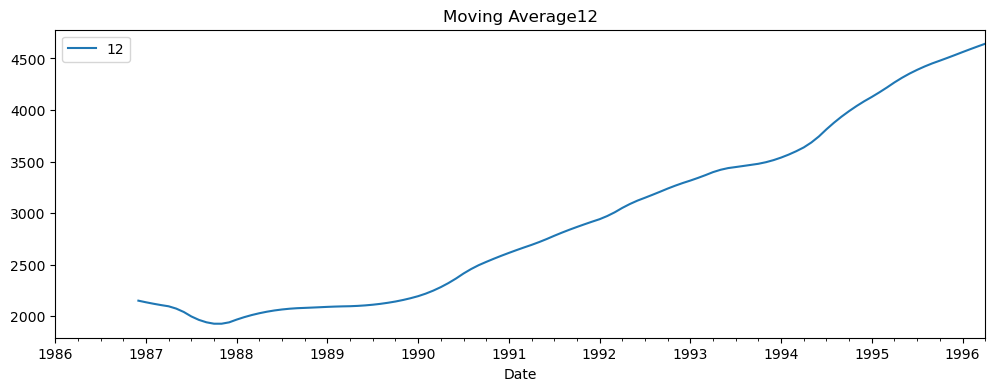

In [39]:
plt.figure(figsize=(14,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(12,4))
    interpolated_month["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average" +str(i))
    plt.legend(loc="best")
    plt.show()

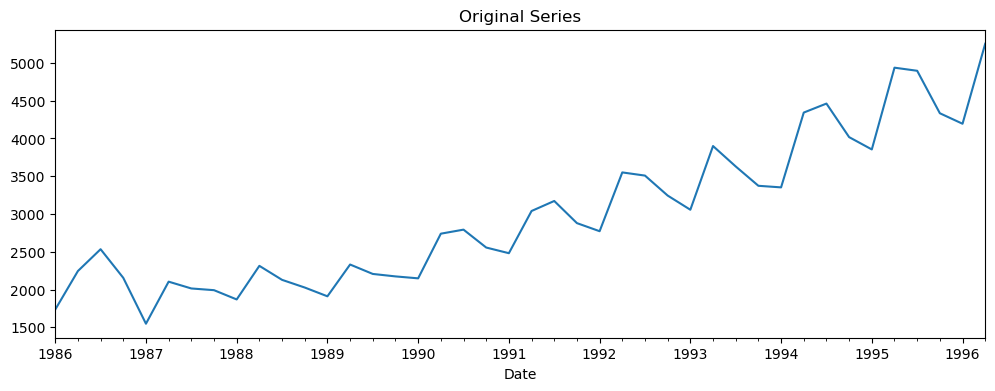

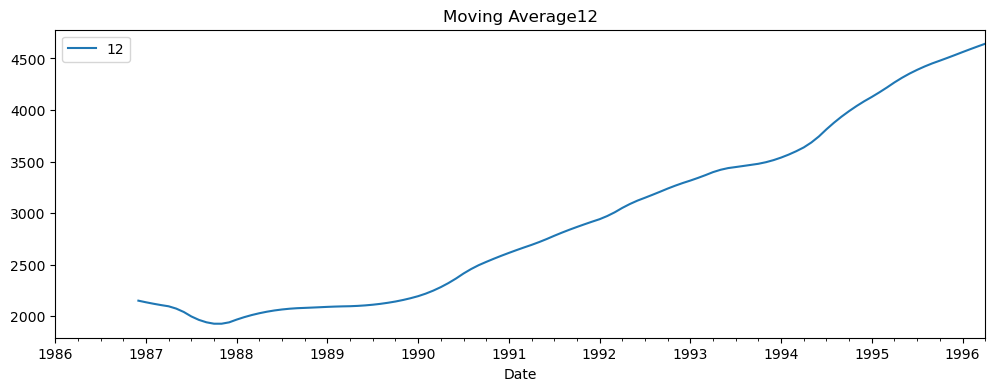

In [40]:
plt.figure(figsize=(12,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
interpolated_month["Sales"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average" +str(12))
plt.legend(loc="best")
plt.show()

#  Time Series Decomposition
# 1. Seasonality
# 2. Trend
# Additive Seasonal Decomposition

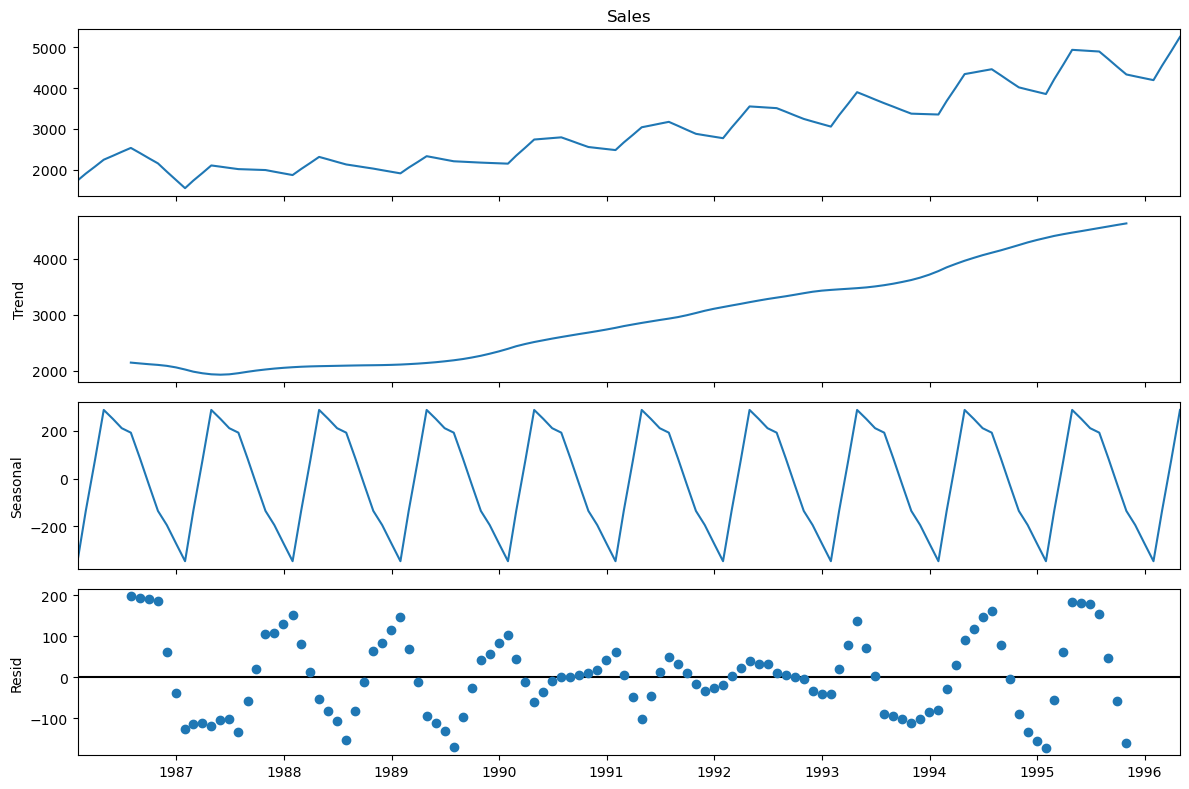

In [41]:
    
decompose_ts_add=seasonal_decompose(interpolated_month.Sales,period=12,model="additive")
with plt.rc_context():
    plt.rc("figure",figsize=(12,8))
    decompose_ts_add.plot()
    plt.show()

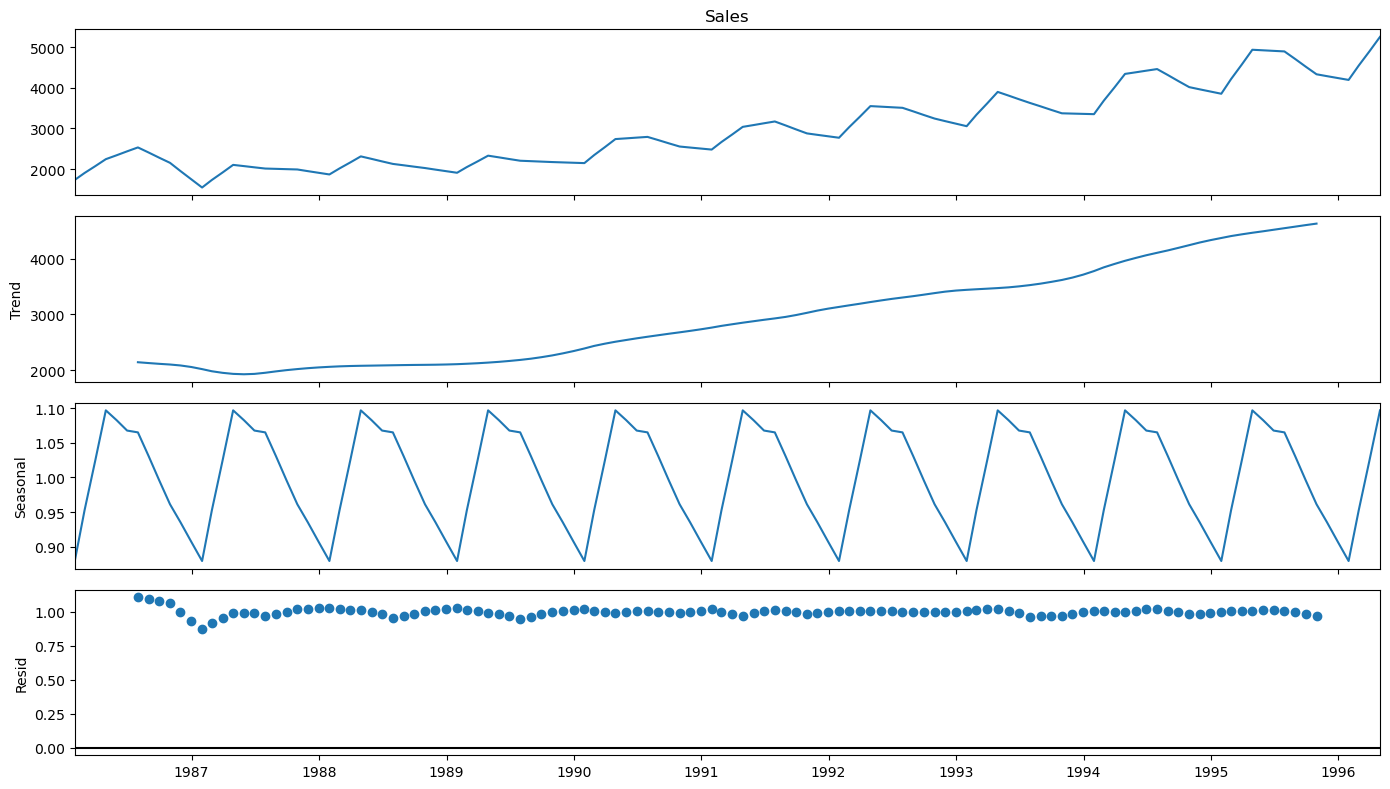

In [42]:
# Multiplicative Seasonal Decomposition
    
decompose_ts_add=seasonal_decompose(interpolated_month.Sales,period=12,model="multiplicative")
with plt.rc_context():
    plt.rc("figure",figsize=(14,8))
    decompose_ts_add.plot()
    plt.show()

In [43]:
# Splitting Train and Test Data

Train=interpolated_month[:100]
Test=interpolated_month[100:]


In [44]:
Train

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1993-12-31,3359.000000
1994-01-31,3352.000000
1994-02-28,3682.000000


In [45]:
Test

,Sales
Date,
1994-05-31,4381.666667
1994-06-30,4421.333333
1994-07-31,4461.000000
1994-08-31,4313.000000
1994-09-30,4165.000000
1994-10-31,4017.000000
1994-11-30,3962.666667
1994-12-31,3908.333333
1995-01-31,3854.000000


In [46]:
print("Train_Data:",Train.index.min(),Train.index.max(),"\n",
     "Test_Data:",Test.index.min(),Test.index.max())

Train_Data: 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test_Data: 1994-05-31 00:00:00 1996-04-30 00:00:00


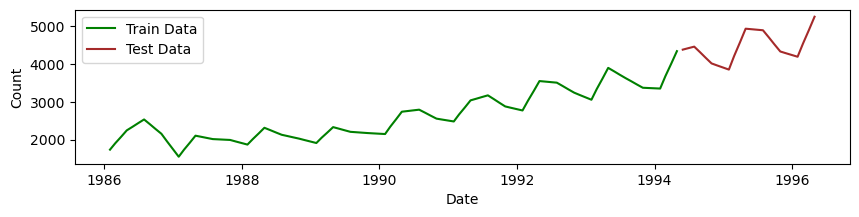

In [47]:

plt.figure(figsize=(10,2))
plt.xlabel("Date")
plt.ylabel("Count")
plt.plot(Train,"green",label="Train Data")
plt.plot(Test,"brown",label="Test Data")
plt.legend()
plt.show()

#  Evaluation Metric MAPE


In [48]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [49]:
# Exponential Methods

# Simple Exponential Method

sem_model=SimpleExpSmoothing(Train["Sales"]).fit(optimized=True)
test_pred_sem=sem_model.forecast(24)
train_pred_sem=sem_model.fittedvalues
test_rmse_sem=sqrt(mean_squared_error(test_pred_sem,Test.Sales))
train_rmse_sem=sqrt(mean_squared_error(train_pred_sem,Train))
mape_sem=MAPE(test_pred_sem,Test.Sales)
print("Simple Exponential Method Evaluation","\n",\
     "Mean Absolute Error = {}".format(mape_sem),"\n",\
     "Train Root Mean Squared Error = {}".format(train_rmse_sem),"\n",
     "Test Root Mean Squared Error={}".format(test_rmse_sem))

Simple Exponential Method Evaluation 
 Mean Absolute Error = 6.6197194272254025 
 Train Root Mean Squared Error = 129.37951431349904 
 Test Root Mean Squared Error=381.95422355078995


In [50]:
# Using Predict Attribute

sem_model=SimpleExpSmoothing(Train["Sales"]).fit(optimized=True)
test_pred_sem=sem_model.predict(start=Test.index[0],end=Test.index[-1])
train_pred_sem=sem_model.fittedvalues
test_rmse_sem=sqrt(mean_squared_error(test_pred_sem,Test.Sales))
train_rmse_sem=sqrt(mean_squared_error(train_pred_sem,Train))
mape_sem=MAPE(test_pred_sem,Test.Sales)
print("Simple Exponential Method Evaluation","\n",\
     "Mean Absolute Error = {}".format(mape_sem),"\n",\
     "Train Root Mean Squared Error = {}".format(train_rmse_sem),"\n",
     "Test Root Mean Squared Error={}".format(test_rmse_sem))

Simple Exponential Method Evaluation 
 Mean Absolute Error = 6.6197194272254025 
 Train Root Mean Squared Error = 129.37951431349904 
 Test Root Mean Squared Error=381.95422355078995


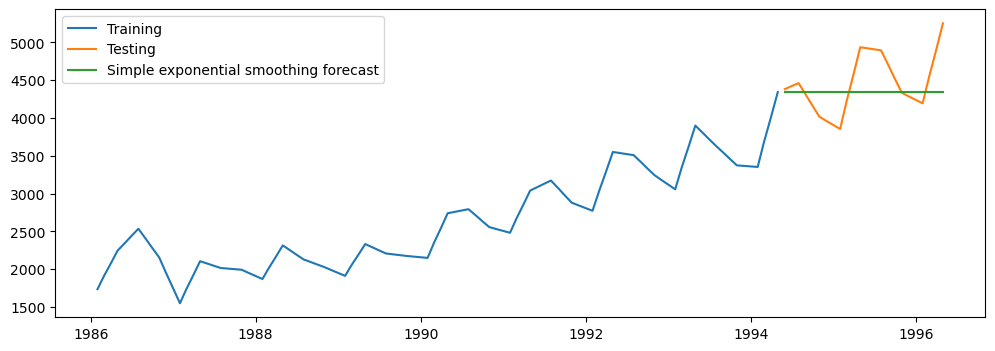

In [51]:
# Difference between Predict and Forecast attribute

plt.figure(figsize=(12,4))
plt.plot(Train,label="Training")
plt.plot(Test,label="Testing")
plt.plot(test_pred_sem,label="Simple exponential smoothing forecast")
plt.legend(loc="best")
plt.show()

In [52]:
# Holt method (Double Exponential)

holt_model=Holt(Train).fit(optimized=True)
test_pred_holt=holt_model.forecast(24)
train_pred_holt=holt_model.fittedvalues
test_rmse_holt=sqrt(mean_squared_error(test_pred_holt,Test.Sales))
train_rmse_holt=sqrt(mean_squared_error(train_pred_holt,Train))
mape_holt=MAPE(test_pred_holt,Test.Sales)
print('Holt Method',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_holt),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_holt),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_holt))


Holt Method 
 Mean Absolute Percent Error   = 89.49316048583718 
 Train Root Mean Squared Error = 108.70855310282539 
 Test Root Mean Squared Error  = 4549.83258496284


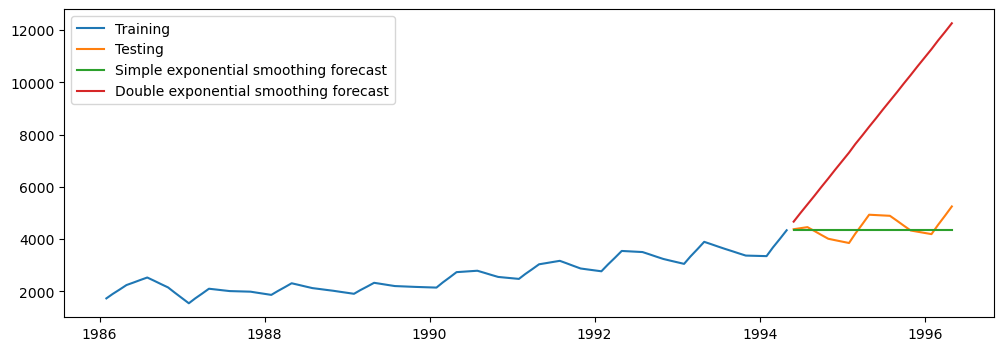

In [53]:
plt.figure(figsize=(12,4))
plt.plot(Train,label="Training")
plt.plot(Test,label="Testing")
plt.plot(test_pred_sem,label="Simple exponential smoothing forecast")
plt.plot(test_pred_holt,label="Double exponential smoothing forecast")
plt.legend(loc="best")
plt.show()

In [54]:
# Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

holt_add_model=ExponentialSmoothing(Train,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_add_holt=holt_add_model.forecast(24)
train_pred_add_holt=holt_add_model.fittedvalues
test_rmse_add_holt=sqrt(mean_squared_error(test_pred_add_holt,Test.Sales))
train_rmse_add_holt=sqrt(mean_squared_error(train_pred_add_holt,Train))
mape_add_holt=MAPE(test_pred_add_holt,Test.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_add_holt),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_add_holt),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_add_holt))


Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 32.09480846589508 
 Train Root Mean Squared Error = 43.27515513746682 
 Test Root Mean Squared Error  = 1651.2413109615302


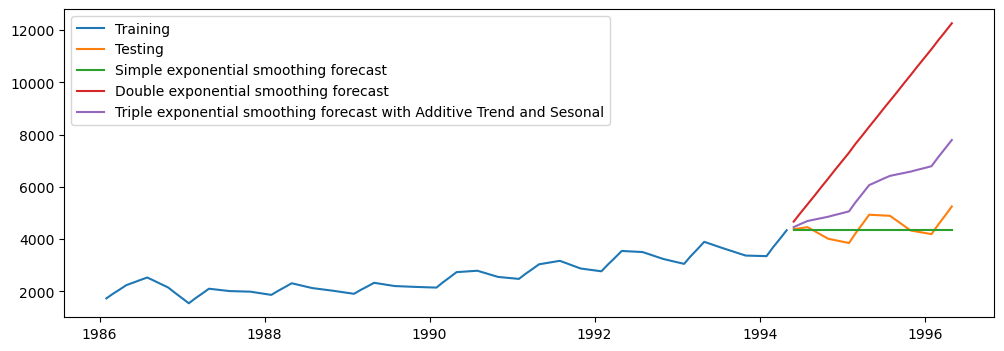

In [55]:
plt.figure(figsize=(12,4))
plt.plot(Train,label="Training")
plt.plot(Test,label="Testing")
plt.plot(test_pred_sem,label="Simple exponential smoothing forecast")
plt.plot(test_pred_holt,label="Double exponential smoothing forecast")
plt.plot(test_pred_add_holt,label="Triple exponential smoothing forecast with Additive Trend and Sesonal")
plt.legend(loc="best")
plt.show()

In [56]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

holt_add_mul_model=ExponentialSmoothing(Train,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_add_mul_holt=holt_add_mul_model.forecast(24)
train_pred_add_mul_holt=holt_add_mul_model.fittedvalues
test_rmse_add_mul_holt=sqrt(mean_squared_error(test_pred_add_mul_holt,Test.Sales))
train_rmse_add_mul_holt=sqrt(mean_squared_error(train_pred_add_mul_holt,Train))
mape_add_mul_holt=MAPE(test_pred_add_mul_holt,Test.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_add_mul_holt),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_add_mul_holt),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_add_mul_holt))


Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 3.4439984303305238 
 Train Root Mean Squared Error = 40.8403677355516 
 Test Root Mean Squared Error  = 199.9314976180311


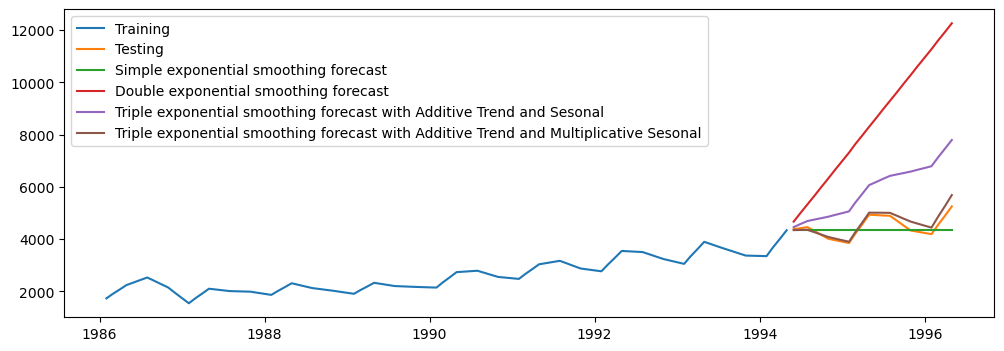

In [57]:
plt.figure(figsize=(12,4))
plt.plot(Train,label="Training")
plt.plot(Test,label="Testing")
plt.plot(test_pred_sem,label="Simple exponential smoothing forecast")
plt.plot(test_pred_holt,label="Double exponential smoothing forecast")
plt.plot(test_pred_add_holt,label="Triple exponential smoothing forecast with Additive Trend and Sesonal")
plt.plot(test_pred_add_mul_holt, label="Triple exponential smoothing forecast with Additive Trend and Multiplicative Sesonal")
plt.legend(loc="best")
plt.show()

In [58]:
# Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

holt_multre_add_model=ExponentialSmoothing(Train,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.5)
test_pred_multre_add_holt=holt_multre_add_model.forecast(24)
train_pred_multre_add_holt=holt_multre_add_model.fittedvalues
test_rmse_multre_add_holt=sqrt(mean_squared_error(test_pred_multre_add_holt,Test.Sales))
train_rmse_multre_add_holt=sqrt(mean_squared_error(train_pred_multre_add_holt,Train))
mape_multre_add_holt=MAPE(test_pred_multre_add_holt,Test.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_multre_add_holt),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_multre_add_holt),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_multre_add_holt))


Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 5.225500395982275 
 Train Root Mean Squared Error = 169.74380784174286 
 Test Root Mean Squared Error  = 270.7789705490516


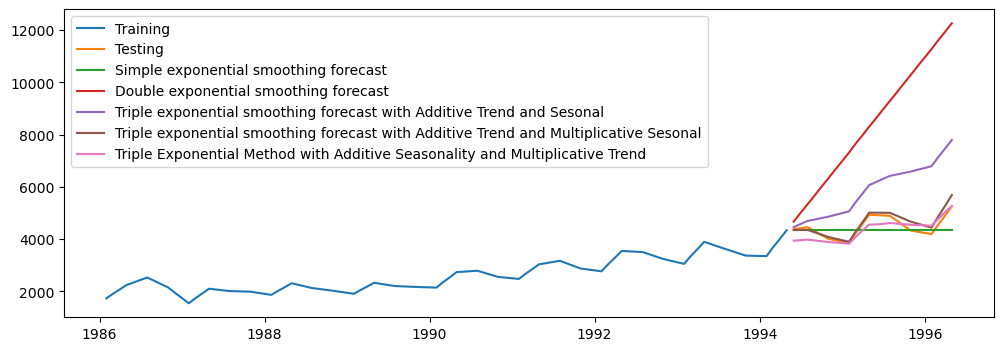

In [59]:
plt.figure(figsize=(12,4))
plt.plot(Train,label="Training")
plt.plot(Test,label="Testing")
plt.plot(test_pred_sem,label="Simple exponential smoothing forecast")
plt.plot(test_pred_holt,label="Double exponential smoothing forecast")
plt.plot(test_pred_add_holt,label="Triple exponential smoothing forecast with Additive Trend and Sesonal")
plt.plot(test_pred_add_mul_holt, label="Triple exponential smoothing forecast with Additive Trend and Multiplicative Sesonal")
plt.plot(test_pred_multre_add_holt, label="Triple Exponential Method with Additive Seasonality and Multiplicative Trend")
plt.legend(loc="best")
plt.show()

In [60]:
 # Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

holt_mst_model=ExponentialSmoothing(Train,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mst_holt=holt_mst_model.forecast(24)
train_pred_mst_holt=holt_mst_model.fittedvalues
test_rmse_mst_holt=sqrt(mean_squared_error(test_pred_mst_holt,Test.Sales))
train_rmse_mst_holt=sqrt(mean_squared_error(train_pred_mst_holt,Train))
mape_mst_holt=MAPE(test_pred_mst_holt,Test.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mst_holt ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mst_holt),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mst_holt))



Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 1.820519852059406 
 Train Root Mean Squared Error = 49.44296353485304 
 Test Root Mean Squared Error  = 102.6597451053885


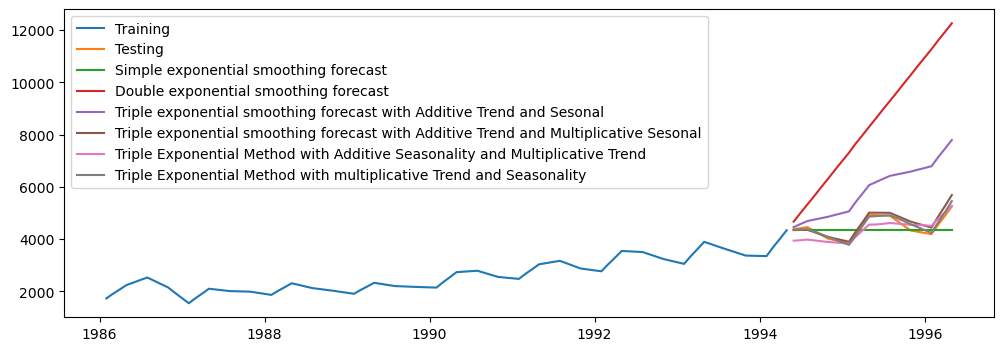

In [61]:
plt.figure(figsize=(12,4))
plt.plot(Train,label="Training")
plt.plot(Test,label="Testing")
plt.plot(test_pred_sem,label="Simple exponential smoothing forecast")
plt.plot(test_pred_holt,label="Double exponential smoothing forecast")
plt.plot(test_pred_add_holt,label="Triple exponential smoothing forecast with Additive Trend and Sesonal")
plt.plot(test_pred_add_mul_holt, label="Triple exponential smoothing forecast with Additive Trend and Multiplicative Sesonal")
plt.plot(test_pred_multre_add_holt, label="Triple Exponential Method with Additive Seasonality and Multiplicative Trend")
plt.plot(test_pred_mst_holt, label="Triple Exponential Method with multiplicative Trend and Seasonality")
plt.legend(loc="best")
plt.show()

#  Comparing the results


In [62]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
            "Train_RMSE":pd.Series([test_rmse_sem,train_rmse_holt,train_rmse_add_holt,train_rmse_add_mul_holt,train_rmse_multre_add_holt,train_rmse_mst_holt]),
            "Test_MAPE(%)":pd.Series([mape_sem,mape_holt,mape_add_holt,mape_add_mul_holt,mape_multre_add_holt,mape_mst_holt]),
            "Test_RMSE_Values":pd.Series([test_rmse_sem,test_rmse_holt,test_rmse_add_holt,test_rmse_add_mul_holt,test_rmse_multre_add_holt,test_rmse_mst_holt])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(["Test_MAPE(%)"],inplace=True,ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Triple_Exp_Mul,49.442964,1.820520,102.659745
1,Triple_Exp_Mul_Add,40.840368,3.443998,199.931498
2,Triple_Exp_Add_Mul,169.743808,5.225500,270.778971
3,Simple_Exp,381.954224,6.619719,381.954224
4,Triple_Exp_Add,43.275155,32.094808,1651.241311
5,Double_Exp,108.708553,89.493160,4549.832585


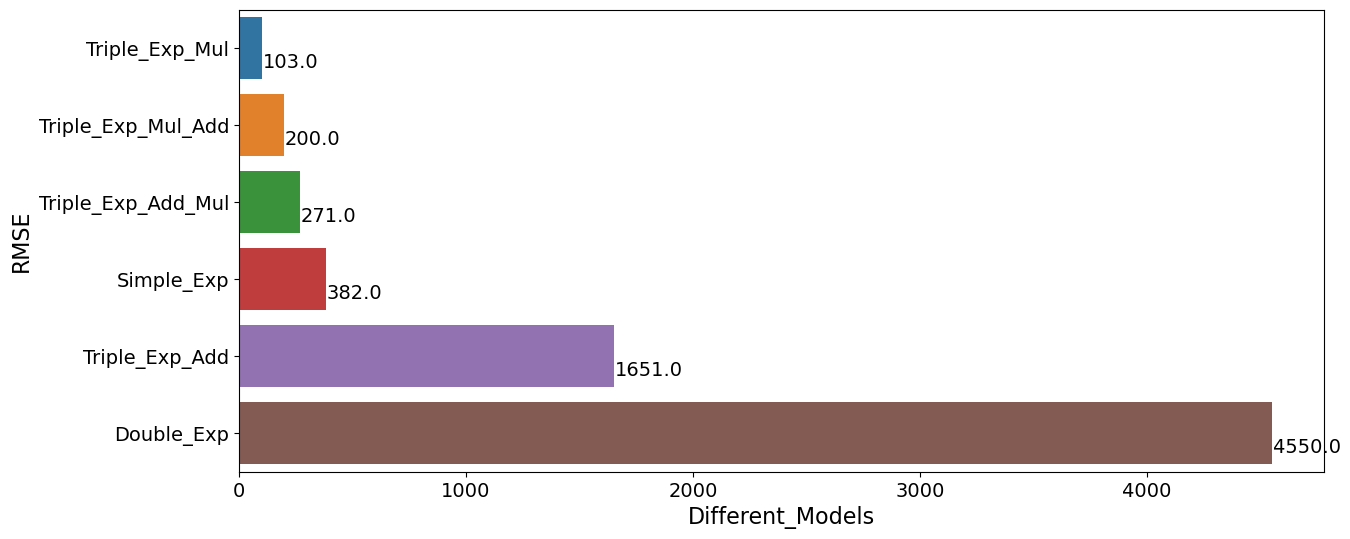

In [63]:
# Visualizing Models Performance

f,axe=plt.subplots(1,1,figsize=(14,6))
sns.barplot(x="Test_RMSE_Values",y="Models",data=table_evaluation,ax=axe)
axe.set_xlabel("Different_Models",size=16)
axe.set_ylabel("RMSE",size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    plt.text(v+3,i+.25,str(v),fontsize=14)
plt.show()

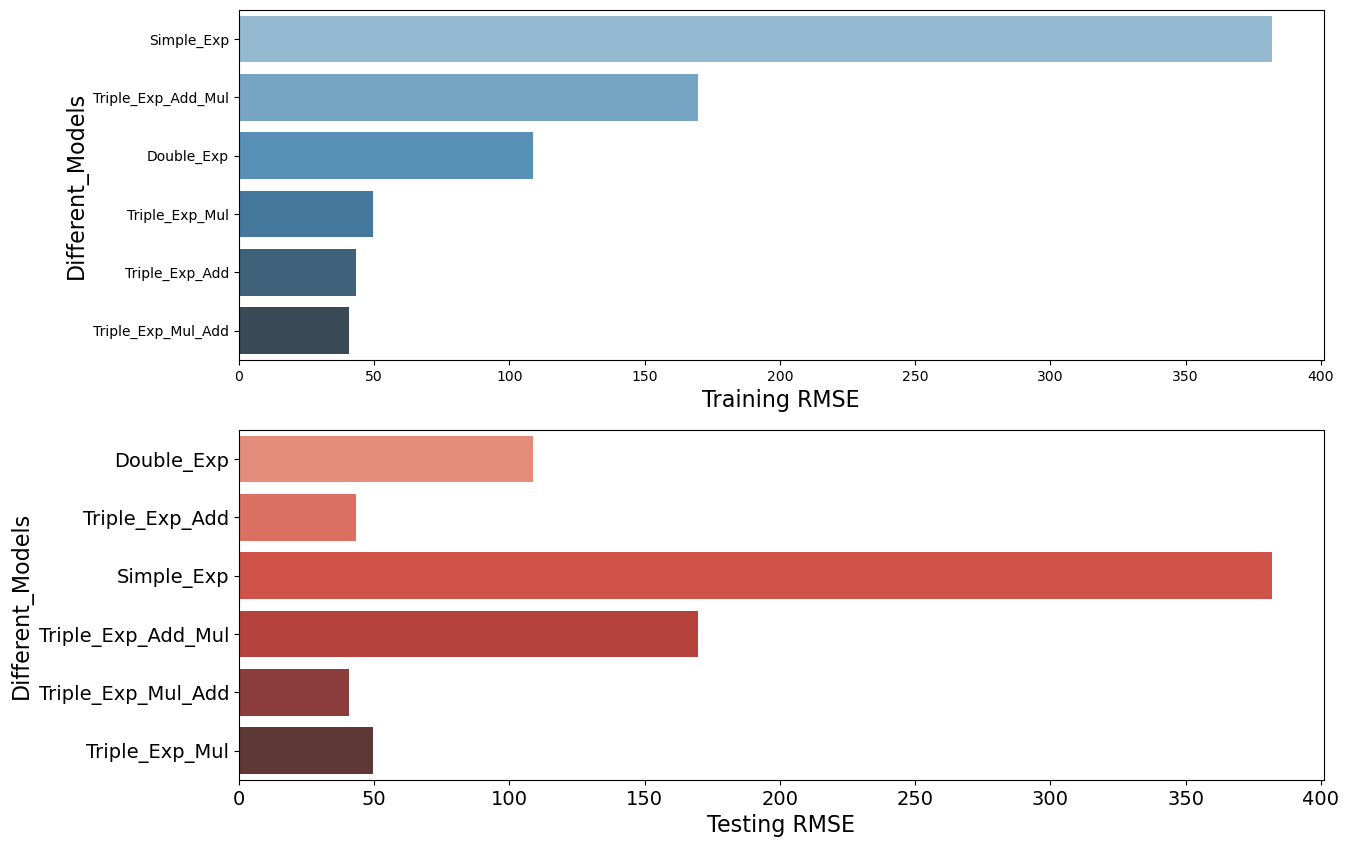

In [64]:
f,axes=plt.subplots(2,1,figsize=(14,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

train_rmse=table_evaluation.sort_values(by=["Train_RMSE"],ascending=False)

sns.barplot(x="Train_RMSE",y="Models",data=train_rmse,palette="Blues_d",ax=axes[0])
axes[0].set_xlabel("Training RMSE",size=16)
axes[0].set_ylabel("Different_Models",size=16)

test_rmse=table_evaluation.sort_values(by=["Test_RMSE_Values"],ascending=False)

sns.barplot(x="Train_RMSE",y="Models",data=test_rmse,palette="Reds_d",ax=axes[1])
axes[1].set_xlabel("Testing RMSE",size=16)
axes[1].set_ylabel("Different_Models",size=16)

plt.show()

#  Autoregressive Integrated Moving Averages (ARIMA)



In [65]:
def test_stationary(timeseries):
    
    #Determining rolling statistics
    
    movingAverage=timeseries.rolling(window=4).mean()
    movingSTD=timeseries.rolling(window=4).std()
    
    # Plot rolling statistics
    orig=plt.plot(timeseries,color="brown",label="Original")
    mean=plt.plot(movingAverage,color="red",label="Rolling Mean")
    plt.legend(loc="best")
    plt.title("Rolling Mean")
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test:
    
    print("Results of Dickey Fuller Test:")
    dftest=adfuller(timeseries["Sales"],autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","#lags used","Number of observations used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value(%s)"%key]=value
    print(dfoutput)

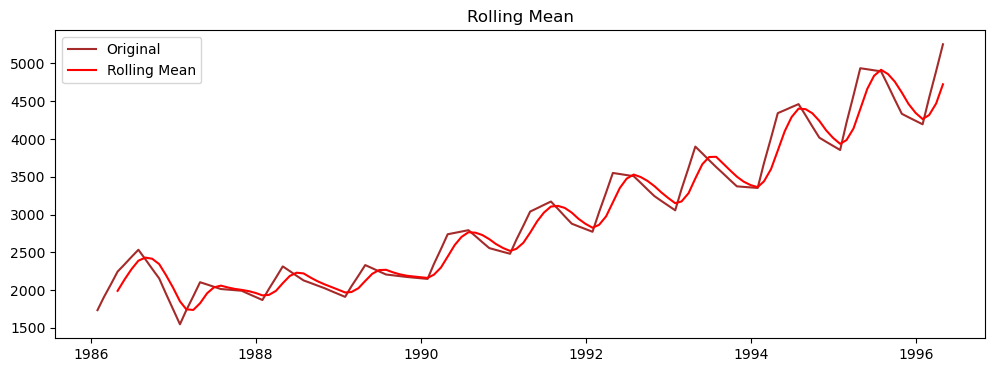

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#lags used                      10.000000
Number of observations used    113.000000
Critical Value(1%)              -3.489590
Critical Value(5%)              -2.887477
Critical Value(10%)             -2.580604
dtype: float64


In [66]:

plt.figure(figsize=(12,4))
sales=pd.DataFrame()
sales["Sales"]=interpolated_month[["Sales"]]
test_stationary(sales)

In [67]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used',"Number of observations used"]
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


In [68]:
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


#  Feature Scaling (Transformations)


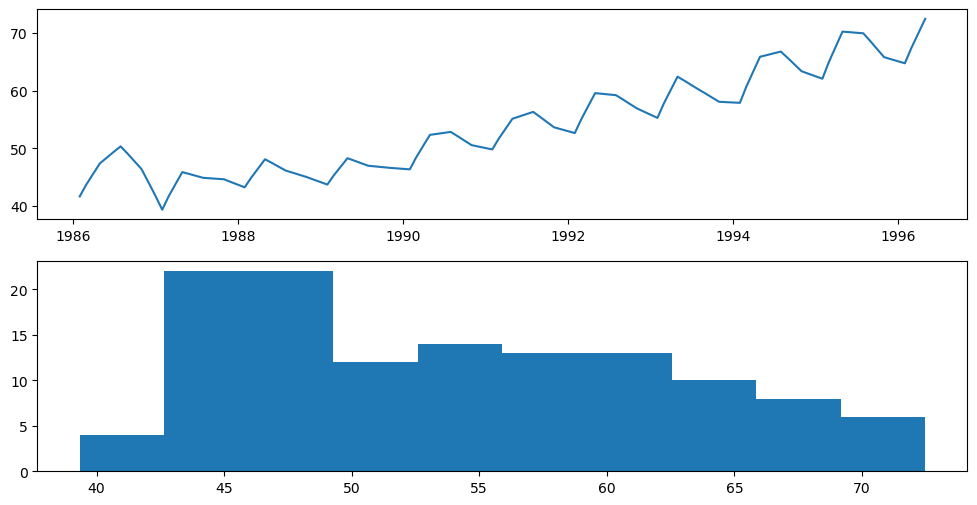

In [69]:
# Square Root Transform

square_root=pd.DataFrame()
square_root=interpolated_month[["Sales"]]
square_root["Sales"]=np.sqrt(square_root.Sales)

#line chart

fig=plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(square_root["Sales"])

# Histogram
plt.subplot(212)
plt.hist(square_root["Sales"])
plt.show()

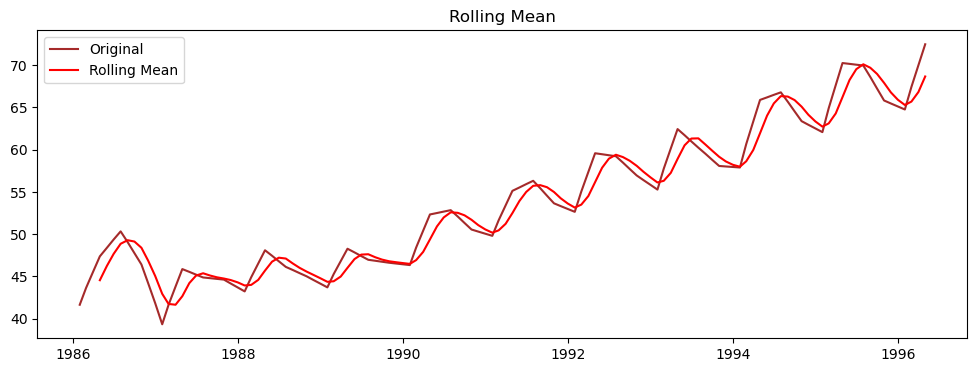

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#lags used                      13.000000
Number of observations used    110.000000
Critical Value(1%)              -3.491245
Critical Value(5%)              -2.888195
Critical Value(10%)             -2.580988
dtype: float64


In [70]:
plt.figure(figsize=(12,4))
test_stationary(square_root)

In [71]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


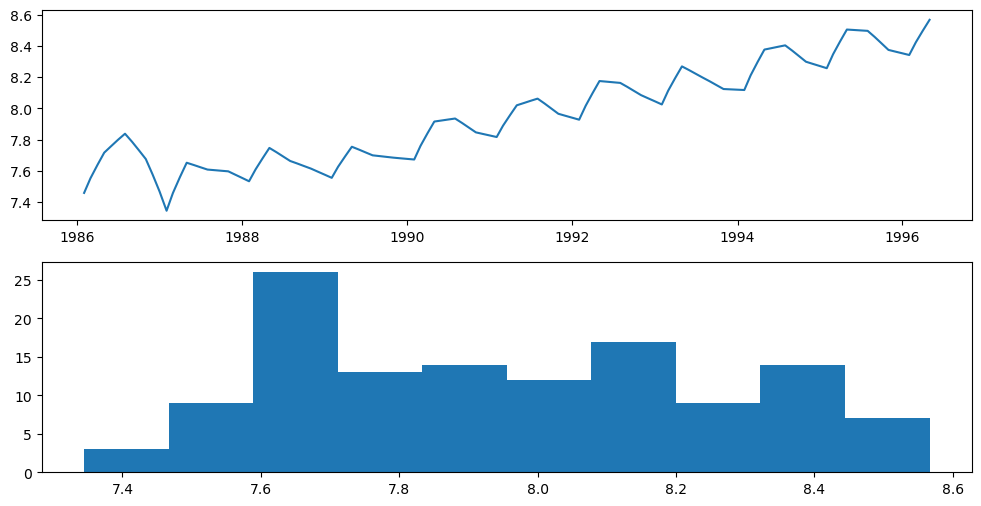

In [72]:
# Log Transform

log=pd.DataFrame()
log=interpolated_month[["Sales"]]
log["Sales"]=np.log(log.Sales)

# Line Chart

fig=plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(log["Sales"])

#Histogram

plt.subplot(212)
plt.hist(log["Sales"])
plt.show()

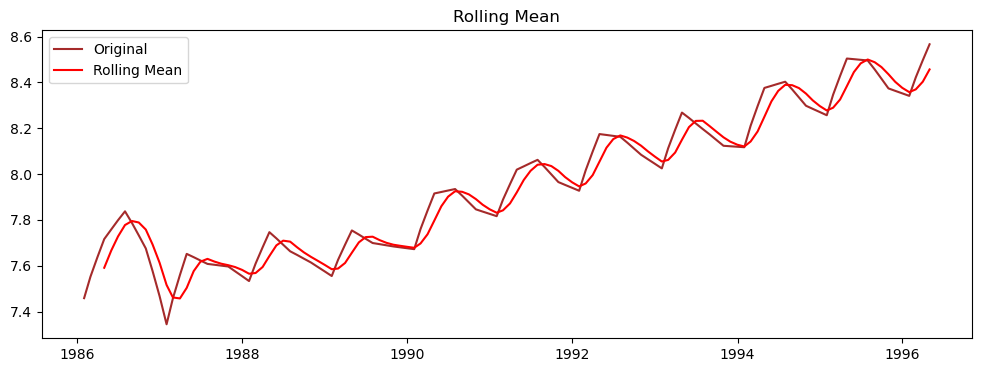

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#lags used                      13.000000
Number of observations used    110.000000
Critical Value(1%)              -3.491245
Critical Value(5%)              -2.888195
Critical Value(10%)             -2.580988
dtype: float64


In [73]:
plt.figure(figsize=(12,4))
test_stationary(log)

In [74]:
adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


,Sales
Date,
1986-01-31,7.458663
1986-02-28,7.552170
1986-03-31,7.637676
1986-04-30,7.716443
1986-05-31,7.758437


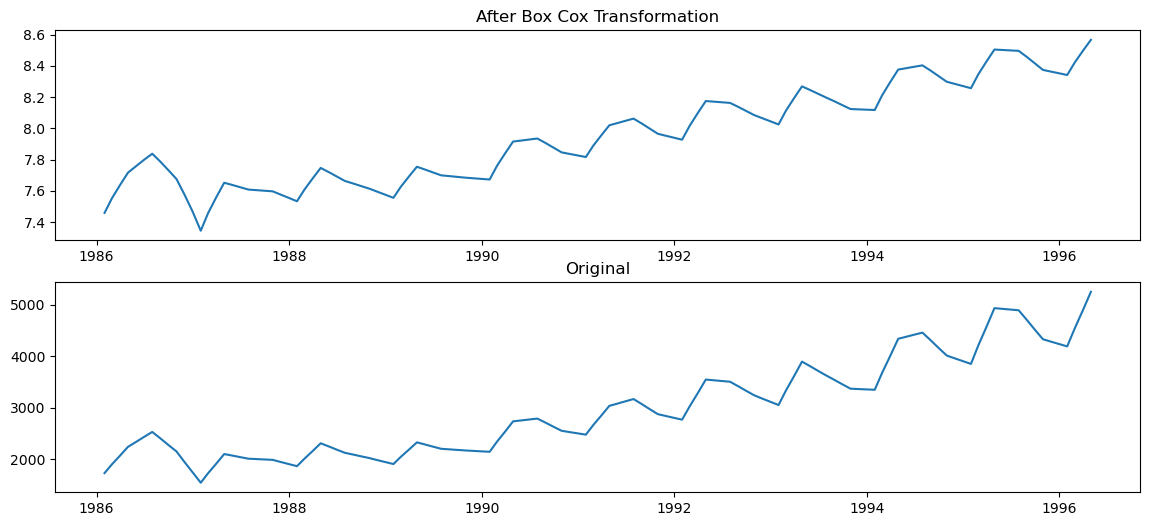

In [75]:
# Box Cox Transformation

df_boxcox=pd.DataFrame()
df_boxcox["Sales"]=pd.Series(boxcox(interpolated_month["Sales"],lmbda=0),interpolated_month.index)
display(df_boxcox.head())
fig,axis=plt.subplots(2,figsize=(14,6))
axis[0].plot(df_boxcox)
axis[0].set_title("After Box Cox Transformation")
axis[1].plot(interpolated_month,label="original")
axis[1].set_title("Original")
plt.show()

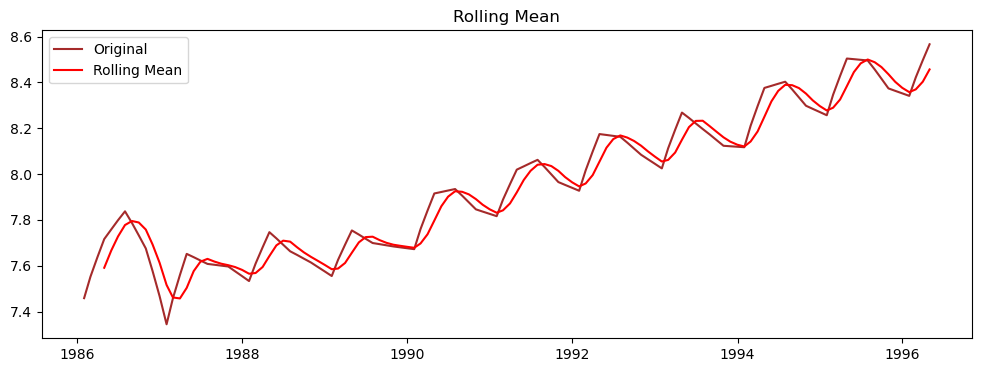

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#lags used                      13.000000
Number of observations used    110.000000
Critical Value(1%)              -3.491245
Critical Value(5%)              -2.888195
Critical Value(10%)             -2.580988
dtype: float64


In [76]:
plt.figure(figsize=(12,4))
test_stationary(df_boxcox)


In [77]:
adf_test(df_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


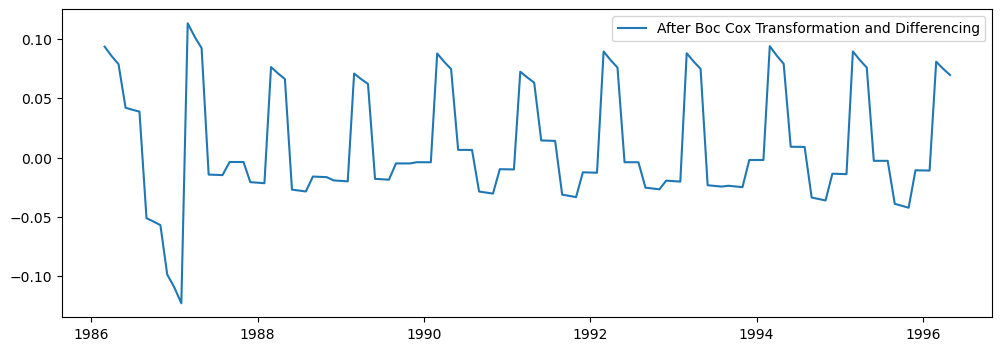

In [78]:
# Differencing of the Box-Cox Transformation

df_boxcox_diff=df_boxcox-df_boxcox.shift()
df_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff,label="After Boc Cox Transformation and Differencing")
plt.legend(loc="best")
plt.show()

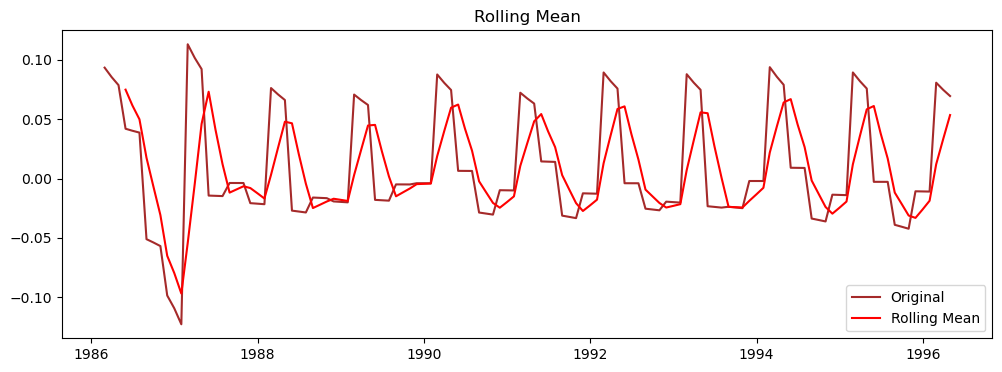

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#lags used                      12.000000
Number of observations used    110.000000
Critical Value(1%)              -3.491245
Critical Value(5%)              -2.888195
Critical Value(10%)             -2.580988
dtype: float64


In [79]:
plt.figure(figsize=(12,4))
test_stationary(df_boxcox_diff)

In [80]:
adf_test(df_boxcox_diff.Sales)

Reject the null hypothesis
Data is stationary


In [81]:
# Building The Time Series Forecasting with Optimal Value using ARIMA

train_df_boxcox=df_boxcox[:100]
test_df_boxcox=df_boxcox[100:]
train_df_boxcox_diff=df_boxcox_diff[:99]
test_df_boxcox_diff=df_boxcox_diff[99:]

In [82]:
# ARIMA Hyperparameter Tuning

# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE


def evaluate_arima_model(X,arima_order):
    
    #Prepare train dataset
    X=X.astype("float32")
    train_size=int(len(X)*0.70)
    train,test=X[0:train_size],X[train_size:]
    history=[x for x in train]
    
    # Make Predictions
    
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model.fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
        # Calculate out of sample error
        
        rmse=sqrt(mean_squared_error(test,predictions))
        return rmse
    
    #Evaluate combinations of p,d,q values for an ARIMA model
    
    def evaluate_models(dataset, p_values,d_values,q_values):
        dataset=dataset.astype("float32")
        best_score,best_cfg=float("inf"),None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    order=(p,d,q)
                    try:
                        rmse=evaluate_arima_model(datset,order)
                        if rmse<best_score:
                            best_score,best_cfg=rmse,order
                    except Exception as e:
                        print(e)
                        continue
        print("Best ARIMA%s RMSE=%.3f" % (best_cfg,best_score))
                        



In [83]:
# Inverse transformation of the Box-Cox Differencing

model=ARIMA(train_df_boxcox_diff,order=(3,0,2))
model_fit=model.fit()
y_hat_ar=df_boxcox_diff.copy()
y_hat_ar["arima_forecast"]=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method

y_hat_ar["arima_forecast"]=y_hat_ar["arima_forecast"].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.

y_hat_ar["arima_forecast"]=y_hat_ar["arima_forecast"].add(df_boxcox.Sales[0])

# Hence, we have to the exponential as it is the reverse of the log.

y_hat_ar["arima_forecast"]=np.exp(y_hat_ar["arima_forecast"])


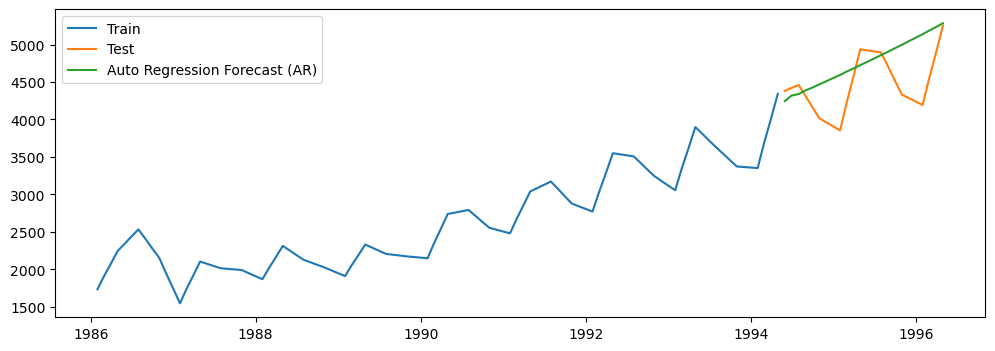

In [84]:
plt.figure(figsize=(12,4))
plt.plot(Train["Sales"],label="Train")
plt.plot(Test,label="Test")
plt.plot(y_hat_ar["arima_forecast"][Test.index.min():],label="Auto Regression Forecast (AR)")
plt.legend(loc="best")
plt.show()

#  Model Evaluation


In [85]:
# RMSE (Root Mean Squared Error)


rmse_arima=np.sqrt(mean_squared_error(Test.Sales,y_hat_ar["arima_forecast"][Test.index.min():])).round(2)
rmse_arima

466.69

In [86]:
# MAPE (Mean Absolute Percent Error)

mape_arima=round(np.mean(np.abs((Test.Sales-y_hat_ar["arima_forecast"][Test.index.min():])/Test.Sales)*100),2)
mape_arima

8.75

In [87]:
# The mean of the Residual should be zero or close to Zero

model_residual=model_fit.resid
model_residual.mean()

0.00019848061314765684

In [88]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


<Figure size 1400x400 with 0 Axes>

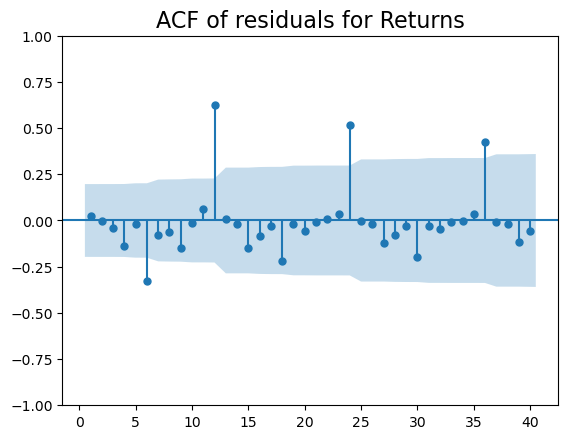

In [89]:
# No autocorrelation between residuals

plt.figure(figsize=(14,4))
plot_acf(model_residual,zero=False,lags=40)
plt.title("ACF of residuals for Returns",size=16)
plt.show()

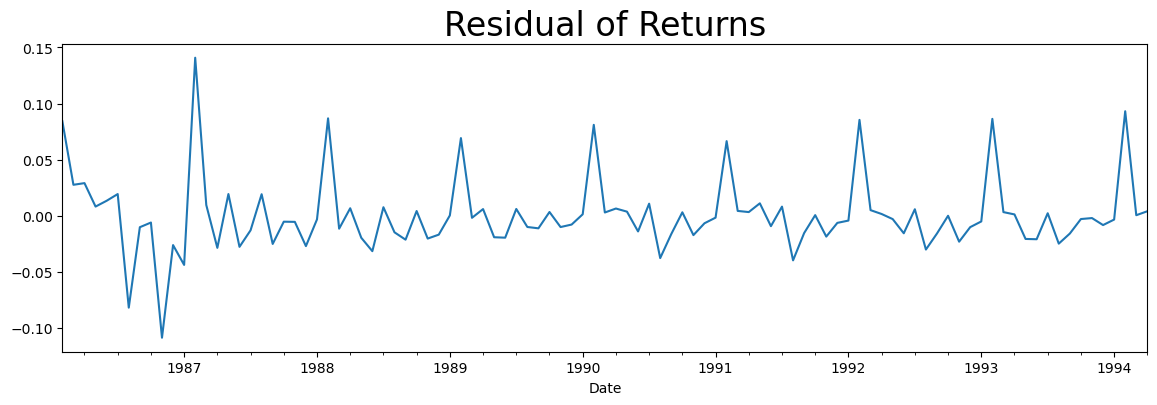

In [90]:
# Residuals must be random

model_residual.plot(figsize=(14,4))
plt.title("Residual of Returns",size=24)
plt.show()

In [91]:
# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

model= SARIMAX(train_df_boxcox,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
y_hat_sarima=df_boxcox_diff.copy()

In [92]:
# Inverse Transformation of the Differencing Box-Cox Transformation

y_hat_sarima["sarima_forecast_boxcox"]=model_fit.predict(df_boxcox_diff.index.min(),df_boxcox_diff.index.max())
y_hat_sarima["sarima_forecast"]=np.exp(y_hat_sarima["sarima_forecast_boxcox"])
y_hat_sarima["sarima_forecast"]=np.exp(y_hat_sarima["sarima_forecast_boxcox"])

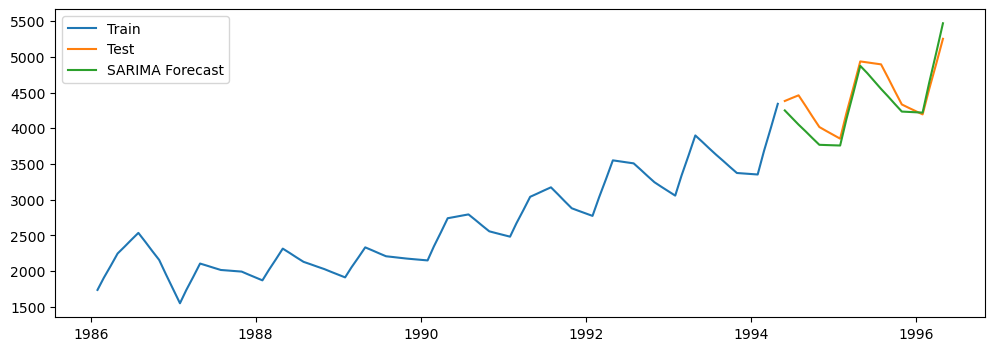

In [93]:

plt.figure(figsize=(12,4))
plt.plot(Train["Sales"],label="Train")
plt.plot(Test,label="Test")
plt.plot(y_hat_sarima["sarima_forecast"][Test.index.min():],label="SARIMA Forecast")
plt.legend(loc="best")
plt.show()

#  Model Evaluation


In [94]:
# RMSE (Root Mean Squared Error)

rmse_sarima=np.sqrt(mean_squared_error(Test,y_hat_sarima["sarima_forecast"][Test.index.min():])).round(2)
rmse_sarima

206.2

In [95]:
# MAPE (Mean Absolute Percent Error)

mape_sarima=round(np.mean(np.abs((Test.Sales-y_hat_sarima["sarima_forecast"][Test.index.min():])/Test.Sales)*100),2)
mape_sarima

3.94

In [96]:
# Analysing the Residuals

model_residual = model_fit.resid
model_residual.mean()

0.03704692163773182

In [97]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


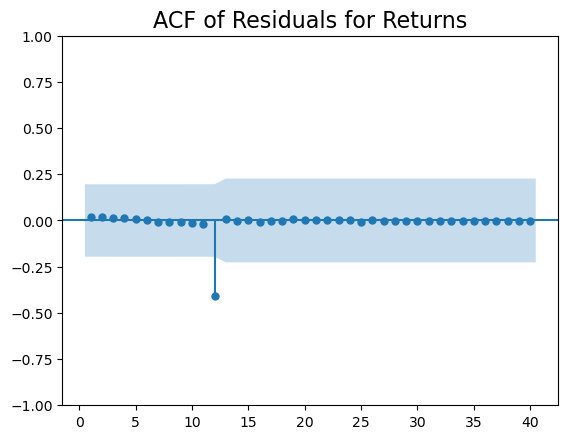

In [98]:
# No autocorrelation between residuals

plot_acf(model_residual,zero=False,lags=40)
plt.title("ACF of Residuals for Returns",size=16)
plt.show()

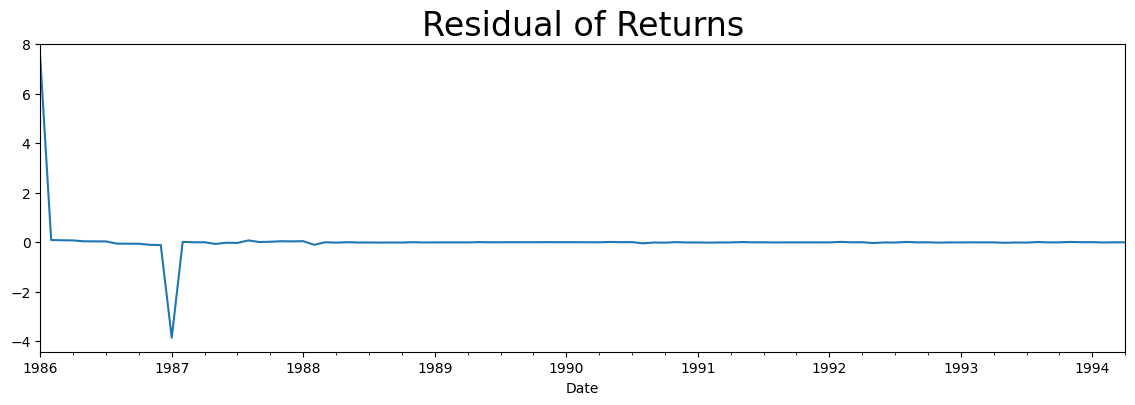

In [99]:

model_residual.plot(figsize=(14,4))
plt.title("Residual of Returns",size=24)
plt.show()

In [100]:
# Creating model with differente Transformation Technique

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul","ARIMA","SARIMA"]),
            "MAPE(%)":pd.Series([mape_sem,mape_holt,mape_add_holt,mape_add_mul_holt,mape_multre_add_holt,mape_mst_holt,mape_arima,mape_sarima]),\
            "RMSE_Values":pd.Series([test_rmse_sem,test_rmse_holt,test_rmse_add_holt,test_rmse_add_mul_holt,test_rmse_multre_add_holt,test_rmse_mst_holt,rmse_arima,rmse_sarima])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(["RMSE_Values"],inplace=True,ignore_index=True)
table_evaluation


,Models,MAPE(%),RMSE_Values
0,Triple_Exp_Mul,1.820520,102.659745
1,Triple_Exp_Mul_Add,3.443998,199.931498
2,SARIMA,3.940000,206.200000
3,Triple_Exp_Add_Mul,5.225500,270.778971
4,Simple_Exp,6.619719,381.954224
5,ARIMA,8.750000,466.690000
6,Triple_Exp_Add,32.094808,1651.241311
7,Double_Exp,89.493160,4549.832585


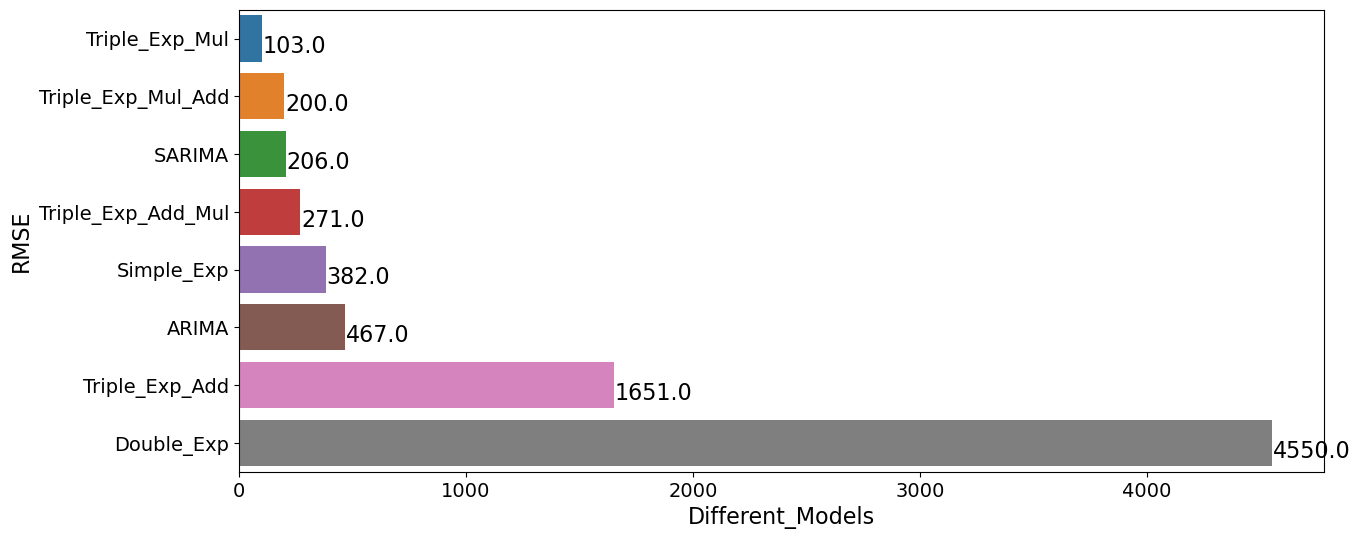

In [101]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 16)

plt.show()


In [102]:
# Data Pre-processing for Model Driven Techniques

interpolated_month.reset_index(inplace=True)
interpolated_month["t"]=np.arange(1,len(interpolated_month)+1)
interpolated_month["t_squared"]=np.square(interpolated_month.t)
interpolated_month["month"]=interpolated_month.Date.dt.strftime("%b")
interpolated_month["year"]=interpolated_month.Date.dt.strftime("%Y")
months=pd.get_dummies(interpolated_month["month"])
months=months[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]
cocacola=pd.concat([interpolated_month,months],axis=1)
cocacola["log_sales"]=np.log(cocacola["Sales"])
cocacola

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


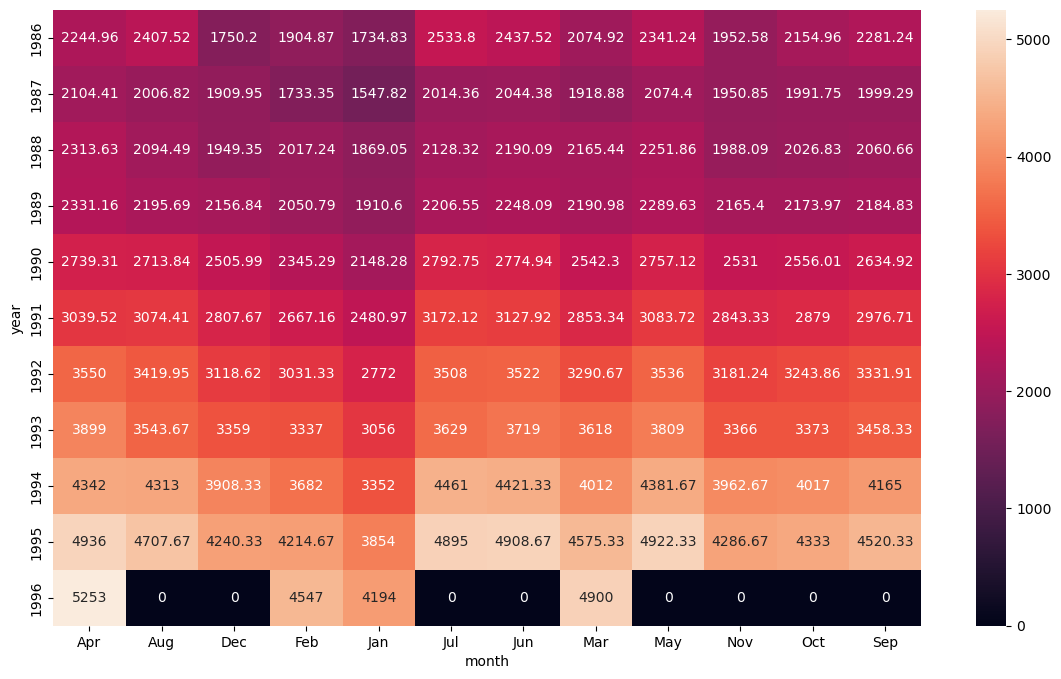

In [103]:

plt.figure(figsize=(14,8))
heatmap_y_month=pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

In [104]:
# Splitting data into Train and Test

size=100

Train=cocacola.iloc[:size]
Test=cocacola.iloc[size:]


In [105]:
Train

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1993-12-31,3359.000000,96,9216,Dec,1993,0,0,0,0,0,0,0,0,0,0,0,1,8.119399
96,1994-01-31,3352.000000,97,9409,Jan,1994,1,0,0,0,0,0,0,0,0,0,0,0,8.117312
97,1994-02-28,3682.000000,98,9604,Feb,1994,0,1,0,0,0,0,0,0,0,0,0,0,8.211211
98,1994-03-31,4012.000000,99,9801,Mar,1994,0,0,1,0,0,0,0,0,0,0,0,0,8.297045


In [106]:
Test

,Date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
100,1994-05-31,4381.666667,101,10201,May,1994,0,0,0,0,1,0,0,0,0,0,0,0,8.385184
101,1994-06-30,4421.333333,102,10404,Jun,1994,0,0,0,0,0,1,0,0,0,0,0,0,8.394197
102,1994-07-31,4461.000000,103,10609,Jul,1994,0,0,0,0,0,0,1,0,0,0,0,0,8.403128
103,1994-08-31,4313.000000,104,10816,Aug,1994,0,0,0,0,0,0,0,1,0,0,0,0,8.369389
104,1994-09-30,4165.000000,105,11025,Sep,1994,0,0,0,0,0,0,0,0,1,0,0,0,8.334472
105,1994-10-31,4017.000000,106,11236,Oct,1994,0,0,0,0,0,0,0,0,0,1,0,0,8.298291
106,1994-11-30,3962.666667,107,11449,Nov,1994,0,0,0,0,0,0,0,0,0,0,1,0,8.284672
107,1994-12-31,3908.333333,108,11664,Dec,1994,0,0,0,0,0,0,0,0,0,0,0,1,8.270866
108,1995-01-31,3854.000000,109,11881,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,8.256867
109,1995-02-28,4214.666667,110,12100,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,8.346326


In [107]:
# Building Ordinary Square Model

# linear Model

linear_model=smf.ols("Sales~t",data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2))
rmse_linear

686.8740863668936

In [108]:
# Exponential Model

exp=smf.ols("log_sales~t",data=Train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(Test["t"])))
rmse_exp=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(pred_exp)))**2))
rmse_exp

530.3268025099047

In [109]:
# Quadratic Mode


quad=smf.ols("Sales~t+t_squared",data=Train).fit()
pred_quad=pd.Series(quad.predict(Test[["t","t_squared"]]))
rmse_quad=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_quad))**2))
rmse_quad

371.294183449867

In [110]:
# Additive Seasonality

add_sea=smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483784

In [111]:
# Additive Seasonality Quadratic

add_sea_quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


225.8049881035947

In [112]:
# Multiplicative Seasonality

mul_sea=smf.ols("log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
pred_mult_sea=pd.Series(mul_sea.predict(Test))
rmse_mult_sea=np.sqrt(np.mean((np.array(Test["Sales"])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1904.794417192035

In [113]:
# Multiplicative additive seasonality

mul_add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 


396.4197817382614

In [114]:
data = {"Models":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
                "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"],inplace=True,ignore_index=True)

In [115]:

e=table_rmse.append(table_evaluation)
e.drop("MAPE(%)",axis=1,inplace=True)
e.sort_values(["RMSE_Values"],inplace=True,ignore_index=True)

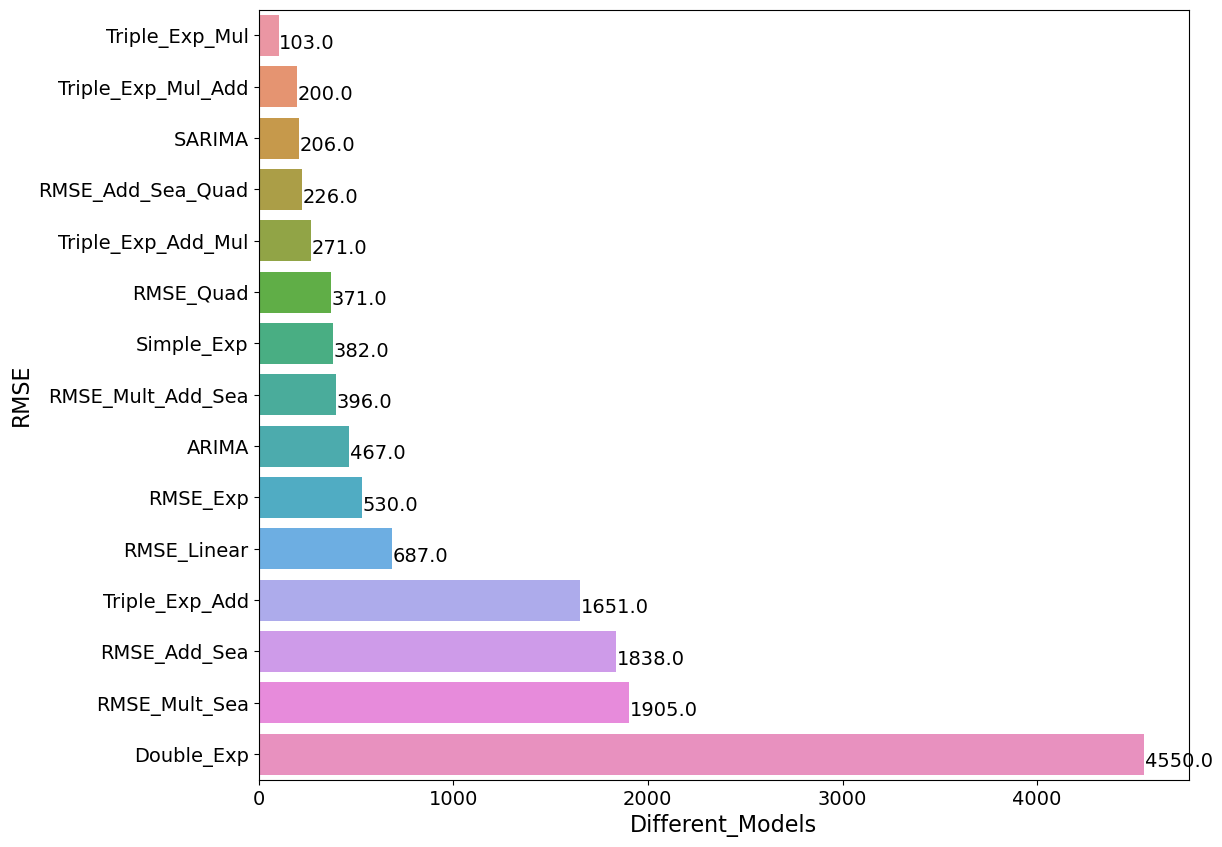

In [116]:
f,axe=plt.subplots(1,1,figsize=(12,10))
sns.barplot(x="RMSE_Values",y="Models",data=e,ax=axe)
axe.set_xlabel("Different_Models",size=16)
axe.set_ylabel("RMSE",size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v+3,i+.25,str(v),fontsize=14)
    
plt.show()